# Hotel Bookings Data

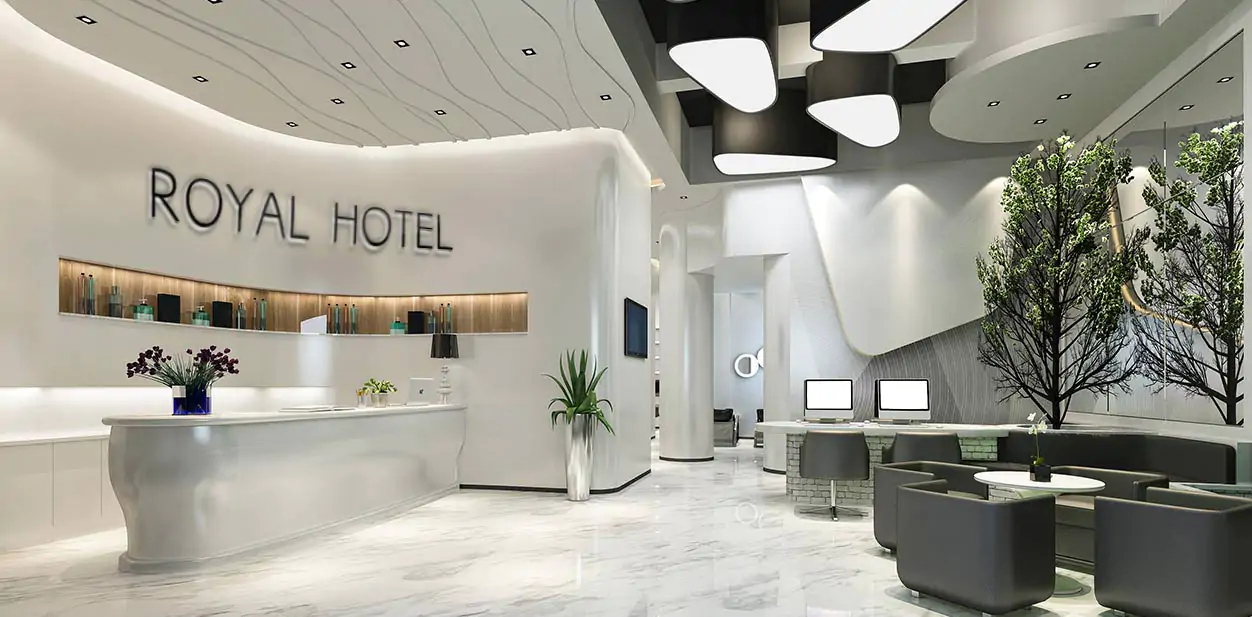

# "Pendahuluan"

## 1.Pernyataan Masalah

Industri perhotelan merupakan sektor yang sangat dinamis yang bergantung pada tingkat hunian untuk mempertahankan pendapatan yang stabil. ***Namun***, salah satu tantangan terbesar yang dihadapi hotel adalah tingkat pembatalan yang tinggi. Pembatalan ini dapat mengakibatkan kerugian yang signifikan, karena kamar yang telah dibayar di muka dan kemudian dibatalkan **tidak dapat segera diisi ulang**. Oleh karena itu, pemahaman yang lebih baik tentang faktor-faktor yang memengaruhi pembatalan sangatlah penting.

Mengapa harus tertarik dengan hal ini? Karena setiap pembatalan yang terjadi dapat memengaruhi **profitabilitas** hotel. Dengan memahami faktor-faktor yang memengaruhi pembatalan, hotel dapat menerapkan kebijakan ***yang lebih terarah*** untuk mengurangi jumlah pembatalan dan meningkatkan tingkat hunian. Hal ini tidak hanya menguntungkan secara finansial, tetapi juga meningkatkan pengalaman pelanggan.

## 2.Rencana Mengatasi Masalah:

Untuk mengatasi masalah ini, kami berencana menganalisis data pemesanan hotel yang mencakup informasi tentang **status pembatalan, jenis hotel, jumlah tamu, jenis kamar yang dipesan, lama menginap, dan faktor lain seperti negara asal tamu dan jenis pemesanan**. Kami akan menggunakan metode analisis data eksploratif menggunakana** machine learning** untuk memahami pola yang ada, serta khususnya teknik **klasifikasi** untuk memprediksi kemungkinan pembatalan berdasarkan data yang ada.

## 3.Pendekatan/ Teknik Analisis yang Diusulkan:

**Pendekatan yang akan digunakan meliputi beberapa langkah analisis:**

1. **Data Preprocessing:** bertujuan guna membersihkan data yang hilang dan mengubah data kategori menjadi format yang bisa di analisis, seperti encoding untuk variabel kategorikal.

2. **Analisis Deskriptif**: Mengidentifikasi distribusi dan korelasi antar variabel untuk mendapatkan wawasan lebih lanjut tentang data. Misalnya, apakah tamu dari negara tertentu lebih cenderung membatalkan pemesanan atau ada pola pola lainnya.

3. **Model Klasifikasi:** Menggunakan algoritma klasifikasi, seperti XGBoost, Decission tree, dan Random Forest untuk memprediksi apakah pemesanan akan dibatalkan atau tidak berdasarkan atribut-atribut yang ada pada pemesanan. Model ini akan dilatih untuk membedakan pola antara pemesanan yang dibatalkan dan yang tidak dibatalkan.

4. Evaluasi Model: Menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk menilai seberapa baik model dapat memprediksi pembatalan.

## 4.Manfaat Analisis bagi Konsumen:

**Analisis ini akan membantu hotel dalam beberapa cara:**

1. **Pengelolaan Pemesanan:** Dengan prediksi yang lebih akurat tentang kemungkinan pembatalan, pihak hotel dapat merencanakan kapasitas kamar dengan lebih efisien. Serta bisa mengalokasikan lebih banyak kamar untuk pemesanan yang memiliki kemungkinan kecil untuk dibatalkan, serta mengelola kamar cadangan dengan lebih baik.

2. **Strategi Pemasaran dan Kebijakan:** Hotel dapat menyusun kebijakan pemesanan yang lebih fleksibel atau menawarkan insentif bagi pelanggan yang tidak membatalkan pemesanan mereka, seperti diskon atau penawaran khusus.

3. **Kepuasan Pelanggan:** Dengan memahami alasan di balik pembatalan pemesanan, hotel bisa meningkatkan pelayanan dan pengalaman pelanggan. Misalnya, jika pembatalan sering terjadi karena masalah dengan jenis kamar atau fasilitas tertentu, hotel bisa berfokus pada perbaikan tersebut.

# "Package yang diperlukan"

## 1.Import Library

In [ ]:
# Library for load dataset
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Library for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## 2.Menghilangkan pemuatan paket

In [ ]:
# Menghilangkan peringatan
warnings.filterwarnings("ignore")

# "Data Preparation"

## 1.Sumber data

Data ini berasal dari **Antonio, Almeida, dan Nunes (2019)** yang mana ini merupakan kumpulan data yang mencakup informasi lengkap tentang pemesanan di dua jenis hotel, yaitu **Resort Hotel** dan **City Hotel**. Data ini mencakup berbagai atribut seperti **status pemesanan (dibatalkan, dilanjutkan, atau no-show)**, **lead time (jumlah hari antara pemesanan dilakukan dan tanggal kedatangan)**, **jumlah tamu (dewasa, anak-anak, dan bayi)**, **tingkat harga harian**, **jenis makanan**, **asal negara**, **segmen pasar**, dan **jumlah permintaan khusus**. Data ini tersedia secara publik dan dapat diunduh melalui tautan hotels.csv. Selain itu, pengguna dapat memuat data menggunakan paket R seperti **tidytuesdayR**.

Data ini sangat berguna untuk berbagai analisis seperti prediksi pembatalan pemesanan, segmentasi pelanggan berdasarkan pola pemesanan, dan perencanaan operasional hotel. Misalnya, dengan analisis pola kedatangan tamu, hotel dapat mengoptimalkan alokasi sumber daya seperti staf atau tempat parkir. Dengan tambahan alat analisis seperti tsibble, fable, dan feasts, data ini juga mendukung analisis deret waktu, seperti prediksi musiman pemesanan dan deteksi pola fluktuasi permintaan.

## 2.Informasi data

Periode pengumpulan data berlangsung dari **1 Juli 2015** hingga 3**1 Agustus 2017** dengan fokus pengambilan data di negara **Portugal**. Hotel Resor (H1) berlokasi di wilayah **Algarve**, sedangkan Hotel Kota (H2) berlokasi di kota **Lisbon**. Dengan kumpulan data yang mencakup** 32 variabel** dan total **119.390 raw data**. Dari jumlah tersebut, **40.060 raw data** berasal dari Hotel Resor (H1), sedangkan **79.330 raw data** lainnya berasal dari Hotel Kota (H2). Data ini dikumpulkan secara real time tanpa menyertakan informasi yang dapat mengidentifikasi hotel atau pelanggan tertentu.

### 2.1 Import Data

In [ ]:
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv -O hotels.csv

--2025-01-05 05:40:56--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotels.csv’

hotels.csv          100%[===================>]  16.07M  --.-KB/s    in 0.06s   

2025-01-05 05:40:56 (269 MB/s) - ‘hotels.csv’ saved [16855599/16855599]



### 2.2 Load Data

In [ ]:
df = pd.read_csv('hotels.csv')

In [ ]:
# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Variabel - Deskripsi** </br>
* **hotel** - Jenis hotel: Resort Hotel (H1) atau City Hotel (H2).  
* **is_canceled** - Status pembatalan reservasi, dengan 1 menunjukkan reservasi dibatalkan dan 0 tidak dibatalkan.  
* **lead_time** - Selang waktu dalam hari antara pemesanan diterima hingga tanggal kedatangan.  
* **arrival_date_year** - Tahun kedatangan pelanggan.  
* **arrival_date_month** - Bulan kedatangan pelanggan.  
* **arrival_date_week_number** - Nomor minggu dalam tahun berdasarkan tanggal kedatangan.  
* **arrival_date_day_of_month** - Hari kedatangan dalam satu bulan.  
* **stays_in_weekend_nights** - Total malam yang dipesan atau diinapi pada akhir pekan (Sabtu dan Minggu).  
* **stays_in_week_nights** - Total malam yang dipesan atau diinapi pada hari kerja (Senin hingga Jumat).  
* **adults** - Jumlah tamu dewasa dalam pemesanan.  
* **children** - Jumlah anak-anak dalam pemesanan.  
* **babies** - Jumlah bayi dalam pemesanan.  
* **meal** - Paket makan yang dipesan, seperti Undefined/SC (tanpa paket makan), BB (Bed & Breakfast), HB (Half Board), atau FB (Full Board).  
* **country** - Negara asal pelanggan dalam format ISO 3155–3:2013.  
* **market_segment** - Segmen pasar untuk pemesanan: "TA" (Travel Agents) atau "TO" (Tour Operators).  
* **distribution_channel** - Saluran distribusi untuk pemesanan, seperti "TA" (Travel Agents) atau "TO" (Tour Operators).  
* **is_repeated_guest** - Indikator apakah tamu merupakan pelanggan yang pernah menginap sebelumnya (1) atau tamu baru (0).  
* **previous_cancellations** - Jumlah reservasi sebelumnya yang dibatalkan oleh tamu.  
* **previous_bookings_not_canceled** - Jumlah reservasi sebelumnya yang tidak dibatalkan oleh tamu.  
* **reserved_room_type** - Kode kamar yang dipesan (dianonimkan).  
* **assigned_room_type** - Kode kamar yang diberikan kepada tamu, yang mungkin berbeda dari yang dipesan (dianonimkan).  
* **booking_changes** - Jumlah perubahan yang dilakukan pada pemesanan sebelum check-in atau pembatalan.  
* **deposit_type** - Jenis deposit: No Deposit (tanpa deposit), Non Refund (deposit penuh), atau Refundable (deposit sebagian).  
* **agent** - ID agen perjalanan yang menangani pemesanan (dianonimkan).  
* **company** - ID perusahaan atau lembaga yang mengurus pemesanan atau pembayarannya (dianonimkan).  
* **days_in_waiting_list** - Jumlah hari pemesanan berada dalam daftar tunggu hingga dikonfirmasi.  
* **customer_type** - Jenis pelanggan: Contract (terikat kontrak), Group (terkait grup), Transient (tidak terikat grup atau kontrak), atau Transient-party (terkait dengan pemesanan transient lainnya).  
* **adr** - Tarif rata-rata harian, dihitung dengan membagi total biaya penginapan dengan jumlah malam menginap.  
* **required_car_parking_spaces** - Jumlah tempat parkir mobil yang diminta oleh pelanggan.  
* **total_of_special_requests** - Jumlah permintaan khusus dari pelanggan, seperti tempat tidur twin atau kamar di lantai atas.  
* **reservation_status** - Status reservasi, seperti Canceled (dibatalkan), Check-Out (tamu telah check-out), atau No-Show (tamu tidak hadir).  
* **reservation_status_date** - Tanggal saat status reservasi terakhir kali diperbarui.

## 3.Pre Processing

### 3.1 Cek Missing Value

In [ ]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Dapat diasumsikan bahwa ketidal adaan data pada kolom jumlah anak menandakan tidak adanya anak yang ikut serta dalam reservasi tersebut. jadi kami rubah menjadi 0.

In [ ]:
df['children'].fillna(0, inplace=True)

Bila absennya informasi pada kolom negara menandakan pelanggan yang asal negaranya tidak dimasukkan dalam sistem, kemungkinan karena reservasi dilakukan tanpa proses formal yang mencatat lokasi. Jadi lebih amannya mengubah menjadi unknown.

In [ ]:
df['country'].fillna('Unknown', inplace=True)

Pelanggan mungkin melakukan pemesanan secara langsung tanpa menggunakan agen perjalanan, seperti pemesanan melalui situs web hotel, telepon langsung, atau aplikasi hotel. jadi angka 999 menandakan pelanggan reservasi langsung.

In [ ]:
df['agent'].fillna(999, inplace=True)

Jika kolom company berisi nilai null, ini dapat menunjukkan bahwa pemesanan tidak dilakukan oleh perusahaan atau lembaga tertentu, atau informasi tentang perusahaan yang bertanggung jawab atas pemesanan tidak tercatat dalam sistem. Ini mungkin terjadi pada pemesanan individu yang dilakukan oleh pelanggan secara pribadi, bukan melalui perusahaan atau lembaga. jadi angka 999 menandakan pelanggan observasi mandiri.

In [ ]:
df['company'].fillna(999, inplace=True)

Bagi kami, mempertahankan kolom dengan nilai null dengan menanganinya memberi  lebih banyak fleksibilitas dan informasi yang berguna untuk analisis. Kami bisa menangani nilai null dengan cara yang lebih cerdas, seperti mengimputasi atau mengganti nilai tersebut dengan label tertentu, dan ini memungkinkan kami untuk terus menggunakan kolom tersebut tanpa kehilangan informasi yang penting. Menghapusnya tanpa pertimbangan bisa mengurangi kualitas dan kedalaman analisis.

### 3.2 Encoding fitur

Fitur kategorikal perlu di-encoding agar model machine learning dapat memprosesnya dengan baik. Tanpa encoding, algoritma tidak dapat memahami data kategorikal dalam bentuk string, yang menghalangi kemampuan model untuk melakukan perhitungan dan analisis yang diperlukan. Encoding mengubah data kategorikal menjadi format numerik yang dapat digunakan oleh model, memungkinkan penghitungan jarak antar data dan mencegah model salah menginterpretasikan urutan atau perbandingan antar kategori. Selain itu, encoding juga dapat meningkatkan akurasi model dan mengurangi bias dalam analisis, sehingga model dapat memanfaatkan informasi dari fitur kategorikal secara maksimal.

In [ ]:
# Misalnya df adalah dataframe asli
df_encoded = df.copy()  # Membuat salinan dataframe

categorical_columns = ['hotel', 'meal', 'country', 'arrival_date_month', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type', 'reservation_status', 'reservation_status_date', 'arrival_date', 'arrival_month']

label_encoders = {}

# Melakukan encoding hanya pada df_encoded
for column in categorical_columns:
    if column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le


## 4.Tampilan setelah pre processing

In [ ]:
# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,999.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,999.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,999.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,999.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,999.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,999.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,999.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
df_encoded

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,999.0,999.0,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,999.0,999.0,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,999.0,999.0,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,999.0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,999.0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,0.0,0,0,15,5,3,0,0,0,0,0,0,0,394.0,999.0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,0.0,0,0,56,6,3,0,0,0,4,4,0,0,9.0,999.0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,0.0,0,0,43,6,3,0,0,0,3,3,0,0,9.0,999.0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,89.0,999.0,0,2,104.40,0,0,1,920


## 5.Rangkuman Data

Dalam proses pengolahan data, langkah-langkah penanganan missing value dan encoding fitur kategorikal merupakan dua komponen penting yang harus dilakukan untuk memastikan kualitas dan kesiapan data sebelum diterapkan pada model machine learning.

**Penanganan Missing Value:**
Missing value atau nilai yang hilang dalam suatu dataset dapat menyebabkan distorsi atau ketidakakuratan dalam model yang akan dibangun, terutama jika model tidak dapat menangani nilai yang hilang dengan baik. Oleh karena itu, penanganan missing value sangat penting untuk menjaga kualitas data yang digunakan. Pada dataset ini, beberapa kolom memiliki nilai yang hilang, seperti `children`, `country`, `agent`, dan `company`. Penanganan missing value dilakukan dengan pendekatan yang sesuai dengan karakteristik masing-masing kolom:
- Kolom `children`: Nilai yang hilang pada kolom ini diinterpretasikan sebagai tidak adanya anak dalam reservasi, yang berarti jika tidak ada informasi yang diberikan, maka dapat diasumsikan bahwa jumlah anak adalah nol.
- Kolom `country`: Missing value pada kolom ini diasumsikan terjadi karena negara asal pelanggan tidak dicatat dalam sistem, kemungkinan besar pada reservasi yang dilakukan tanpa proses formal yang mencatat lokasi secara lengkap.
- Kolom `agent` dan `company`: Missing value pada kolom ini diartikan bahwa pemesanan tidak melibatkan agen perjalanan atau perusahaan yang tercatat, sehingga pemesanan bersifat independen.

Dengan pendekatan kali ini, nilai yang hilang tidak dihapus, melainkan diinterpretasikan dan ditangani secara strategis untuk mempertahankan informasi yang berguna dan mengurangi potensi bias dalam analisis atau prediksi yang dilakukan menggunakan model machine learning.

**Encoding Fitur Kategorikal:**
Fitur kategorikal dalam dataset, seperti `hotel`, `meal`, `country`, dan beberapa kolom lainnya, berisi informasi dalam bentuk teks yang tidak dapat langsung digunakan oleh sebagian besar algoritma machine learning. Oleh karena itu, diperlukan teknik encoding untuk mengubah data kategorikal menjadi bentuk numerik yang dapat diproses oleh model. Dalam kasus ini, `LabelEncoder` digunakan untuk mengubah nilai-nilai kategorikal menjadi nilai numerik, dengan memberikan representasi angka pada masing-masing kategori dalam kolom tersebut. Misalnya, kolom `hotel` yang memiliki dua kategori yaitu "Resort Hotel" dan "City Hotel", diubah menjadi angka yang mewakili masing-masing kategori.

Penerapan encoding ini memungkinkan model untuk mengenali hubungan antar kategori dan memanfaatkan informasi tersebut dalam proses pembelajaran, mengurangi potensi kesalahan interpretasi yang terjadi jika data dibiarkan dalam bentuk string. Dengan demikian, encoding fitur kategorikal merupakan langkah yang esensial untuk mempersiapkan data dalam format yang sesuai dengan input model machine learning, memastikan bahwa data dapat dianalisis dengan tepat dan efisien.

**Kesimpulan:**
Secara keseluruhan, penanganan missing value dan encoding fitur kategorikal merupakan langkah-langkah pra-pemrosesan data yang bertujuan untuk meningkatkan kualitas data dan memastikan bahwa dataset siap untuk digunakan dalam model machine learning. Dengan menangani missing value secara tepat dan menerapkan encoding pada fitur kategorikal, dapat meminimalkan risiko bias, meningkatkan efisiensi analisis, dan memastikan bahwa model machine learning dapat berfungsi dengan baik menggunakan data yang telah dipersiapkan secara optimal.

# "Eksplorasi dan analisa data"

## 1.Tren Pembatan

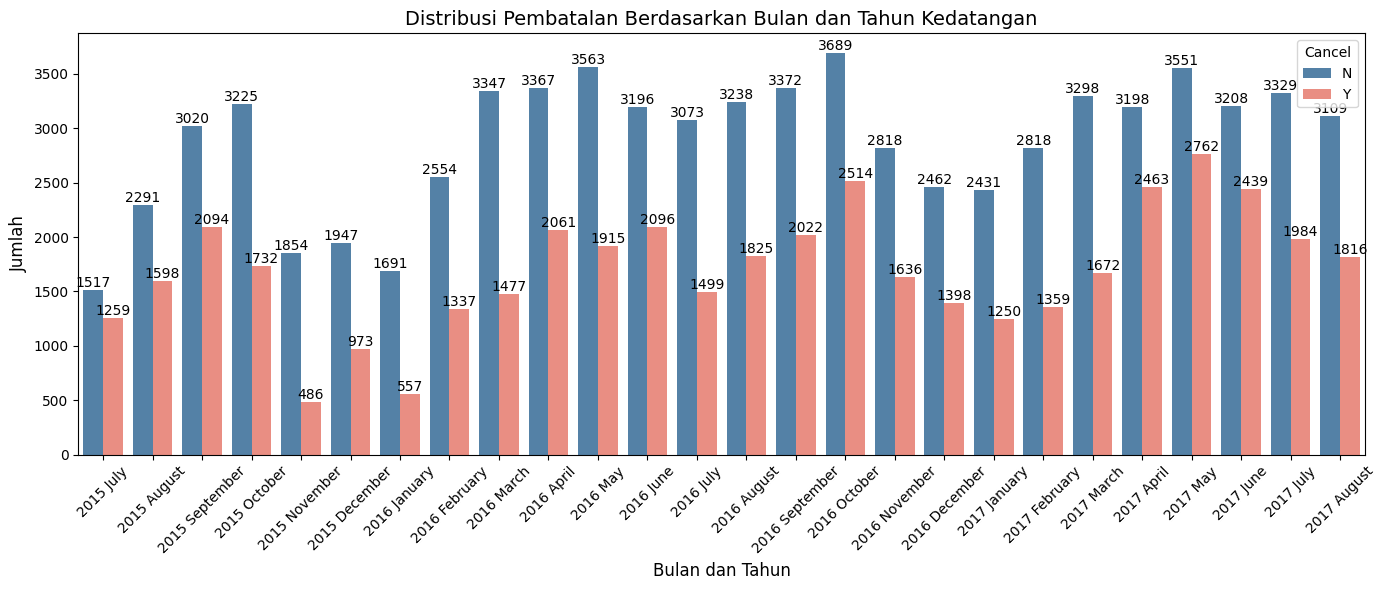

In [ ]:


df['arrival_date_month'] = df['arrival_date_month'].astype(str)

df['arrival_date_year_month'] = df['arrival_date_year'].astype(str) + ' ' + df['arrival_date_month']

order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

plt.figure(figsize=(14, 6))

color_map = {0: 'steelblue', 1: 'salmon'}
g = sns.countplot(data=df, x='arrival_date_year_month', hue='is_canceled', palette=color_map)

for container in g.containers:
    g.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribusi Pembatalan Berdasarkan Bulan dan Tahun Kedatangan', fontsize=14)
plt.xlabel('Bulan dan Tahun', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Cancel', loc='upper right', labels=['N', 'Y'])
plt.tight_layout()
plt.show()


Jika di lihat sekilas tidak ada kenaikan dan penurunan yang begitu signifikan, akan tetapi ada tren tersembunyi dimana pada akhir tahun jumlah pengunjung malah berkurang dibandingkan bulan bulan lainnya.

## 2.Tren Jenis hotel yang disukai

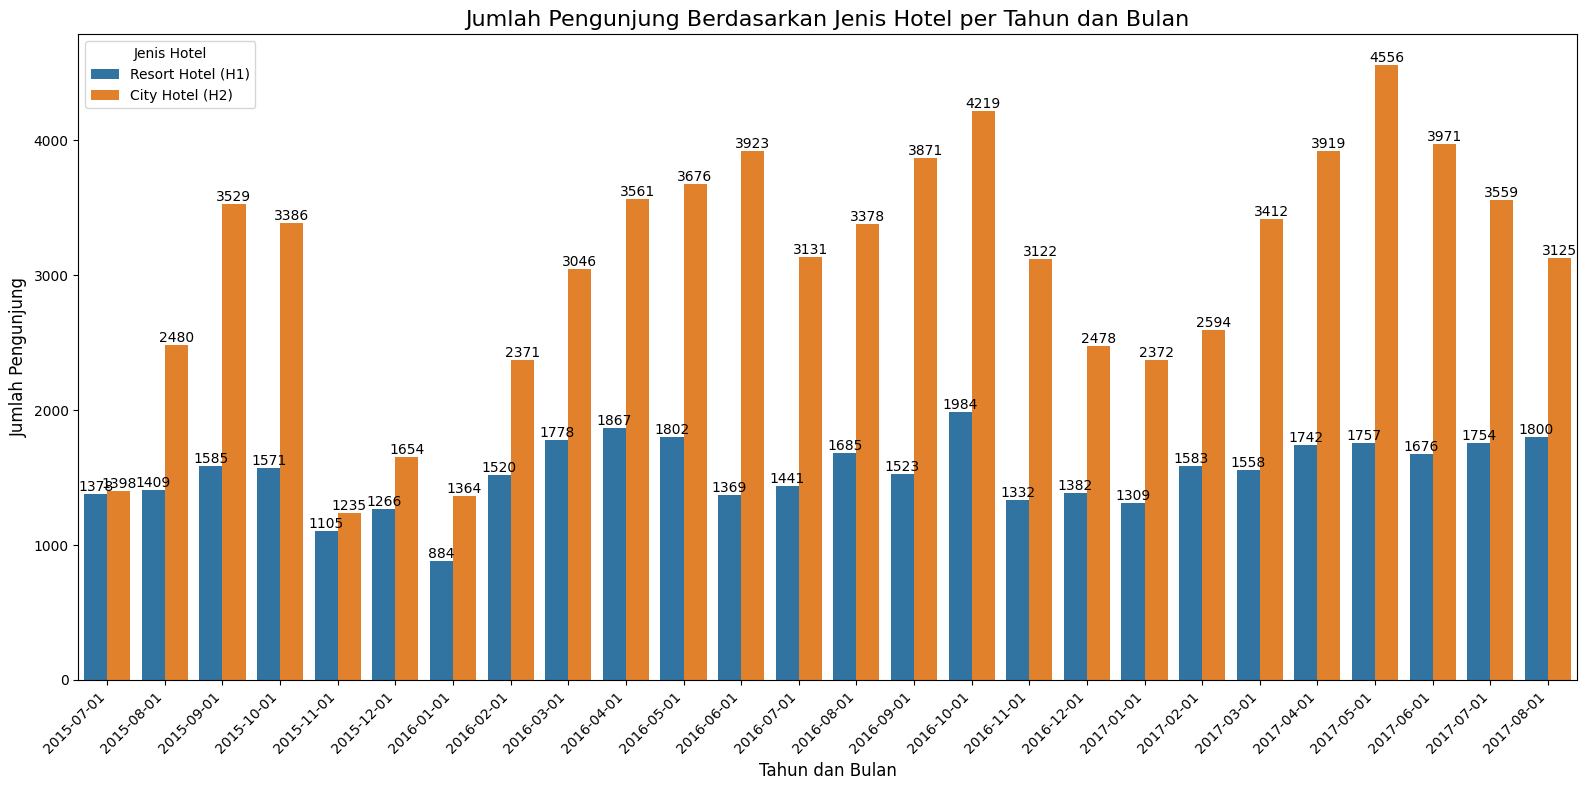

In [ ]:
# Ubah kolom 'arrival_date_month' menjadi kategori dengan urutan bulan yang benar
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

# Membuat kolom baru 'arrival_date_year_month' untuk menggabungkan tahun dan bulan
df['arrival_date_year_month'] = df['arrival_date_year'].astype(str) + ' ' + df['arrival_date_month'].astype(str)

# Grouping data berdasarkan tahun, bulan, dan jenis hotel
monthly_visitors = df.groupby(['arrival_date_year_month', 'hotel']).size().reset_index(name='visitor_count')

# Urutkan berdasarkan bulan dan tahun
monthly_visitors['arrival_date_year_month'] = pd.to_datetime(monthly_visitors['arrival_date_year_month'], format='%Y %B')
monthly_visitors = monthly_visitors.sort_values('arrival_date_year_month')

# Plotting data
plt.figure(figsize=(16, 8))

# Gambar barplot dengan menggunakan seaborn
g = sns.barplot(data=monthly_visitors, x='arrival_date_year_month', y='visitor_count', hue='hotel', ci=None)

# Menambahkan label jumlah di atas setiap bar
for container in g.containers:
    g.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan label dan judul
plt.title('Jumlah Pengunjung Berdasarkan Jenis Hotel per Tahun dan Bulan', fontsize=16)
plt.xlabel('Tahun dan Bulan', fontsize=12)
plt.ylabel('Jumlah Pengunjung', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Jenis Hotel', loc='upper left', labels=['Resort Hotel (H1)', 'City Hotel (H2)'])
plt.tight_layout()

# Menampilkan plot
plt.show()

Seperti Diagram sebelumnya, jumlah pengunjung kedua jenis hotel juga mengalami penurunan menuju akhir tahun. untuk kebanyakan pengungunjung lebih menyukai hotel di kota daripada sebuah resort.

## 3.Tipe makanan berdasarkan jenis hotel

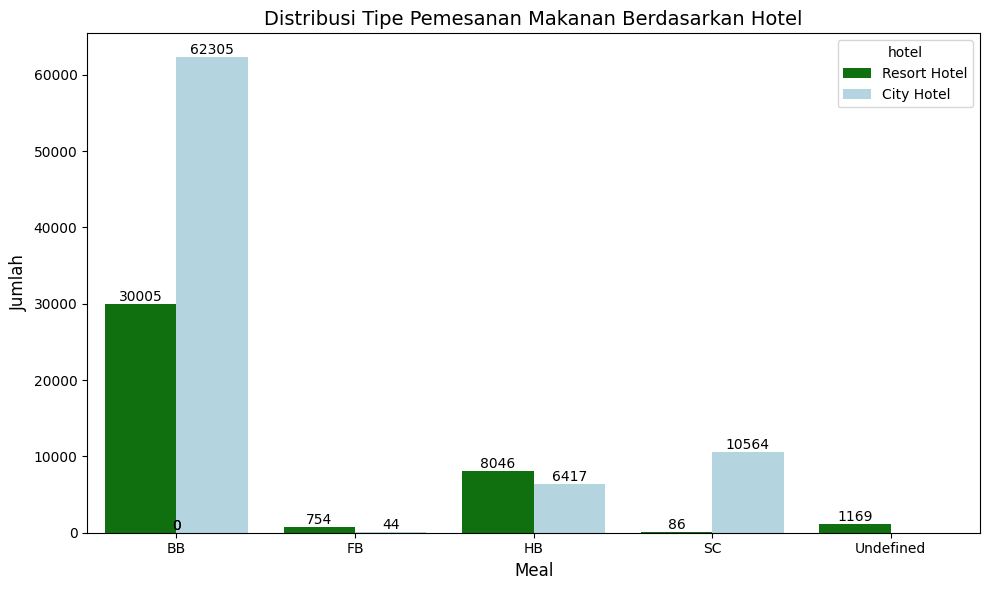

In [ ]:
# Plot distribusi tipe pemesanan makanan berdasarkan hotel
plt.figure(figsize=(10, 6))

# Mengatur palet warna secara manual
color_map = ['green', 'lightblue']  # Ubah sesuai kebutuhan
ax = sns.countplot(x='meal', data=df, hue='hotel', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Tipe Pemesanan Makanan Berdasarkan Hotel', fontsize=14)
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Dilihat dari Tipe pemesanan makanan baik untuk resort maupun city hotel, kebanyakan yaitu Bed & Breakfast (BB).

## 4.Negara Pengunjung

In [ ]:
!pip install pycountry

In [ ]:
import pycountry

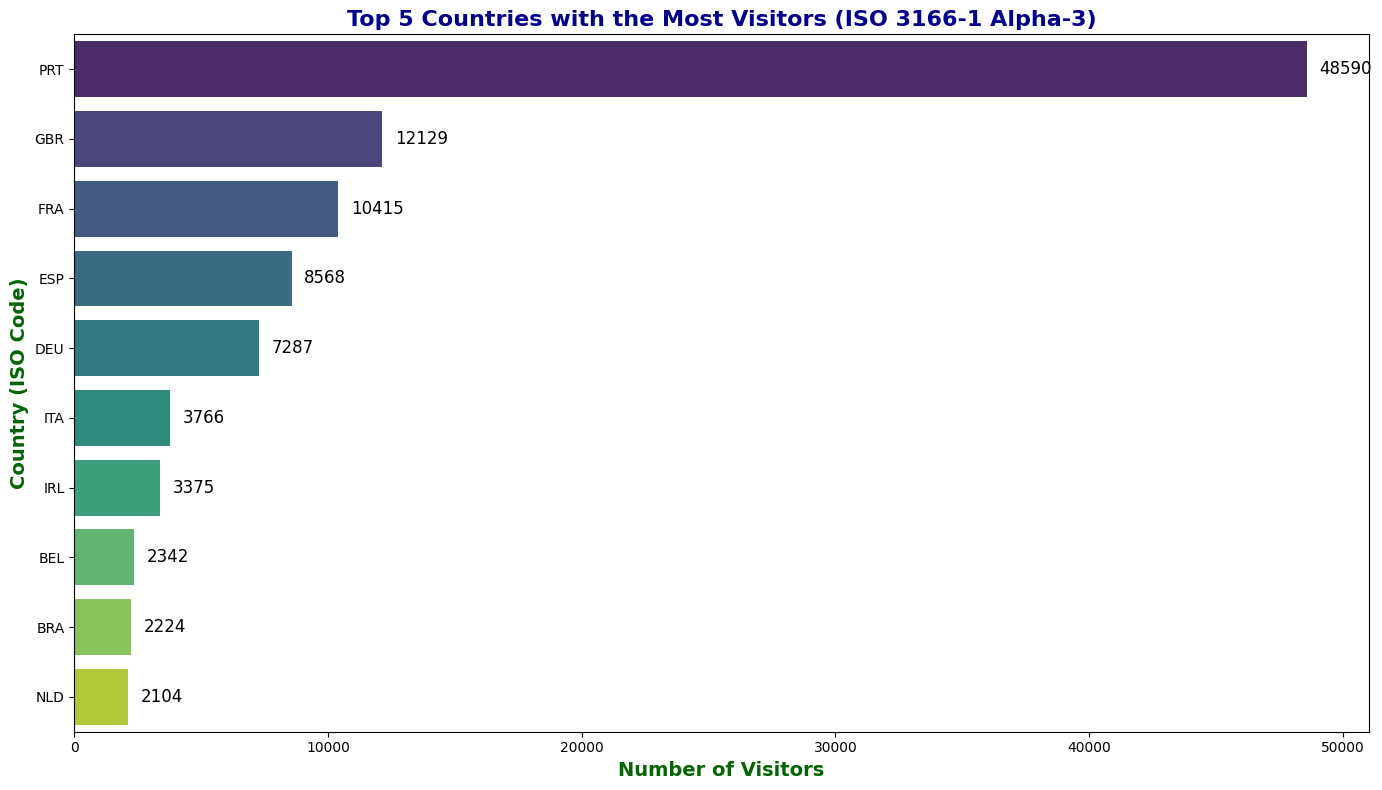

In [ ]:
# Hitung jumlah pengunjung untuk setiap negara
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Pilih 5 negara teratas
top_10_countries = country_counts.head(10)

# Terapkan fungsi untuk mendapatkan kode ISO 3166-1 alpha-3
top_10_countries['iso_code'] = top_10_countries['country']

# Membuat barplot
plt.figure(figsize=(14, 8))

# Ganti palet warna
sns.barplot(x='counts', y='country', data=top_10_countries, palette='viridis')

# Menambahkan angka pada setiap batang untuk menunjukkan jumlah pengunjung
for index, value in enumerate(top_10_countries['counts']):
    plt.text(value + 500, index, f'{value}', ha='left', va='center', fontsize=12, color='black')  # Mengubah warna teks menjadi hitam agar kontras

# Menambahkan judul dan label sumbu
plt.title('Top 5 Countries with the Most Visitors (ISO 3166-1 Alpha-3)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Visitors', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Country (ISO Code)', fontsize=14, weight='bold', color='darkgreen')

# Menampilkan grafik
plt.tight_layout()
plt.show()

Negara pengunjung terbanyak negara tempat berasal dari negara pengambilan data ini yaitu portugal dengan total 48590 pengunjung dilanjut gibraltar,france,spanyol, jerman, belgia, italia, irlandia, belgia, brazil dan belanda

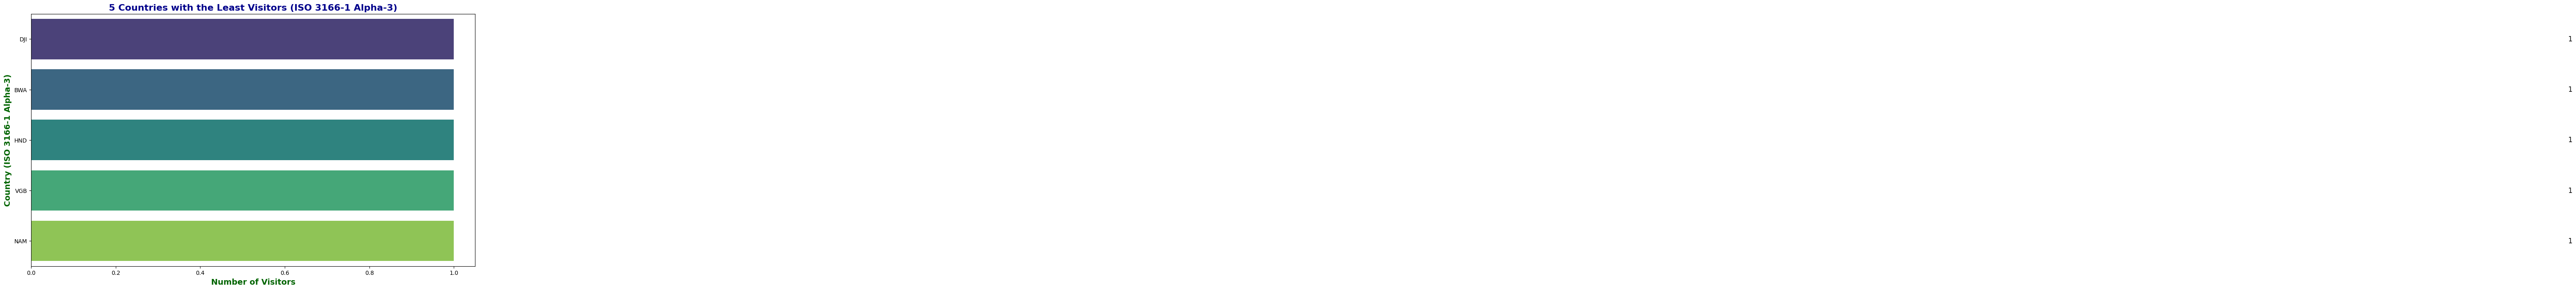

In [ ]:
# Hitung jumlah pengunjung untuk setiap negara
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Pilih 5 negara terbawah
bottom_5_countries = country_counts.tail(5)

# Mendapatkan nama negara ISO 3166-1 alpha-3
bottom_5_countries['country_iso'] = bottom_5_countries['country'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if pycountry.countries.get(alpha_2=x) else 'Unknown')

# Membuat barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='counts', y='country', data=bottom_5_countries, palette='viridis')

# Menambahkan angka pada setiap batang untuk menunjukkan jumlah pengunjung
for index, value in enumerate(bottom_5_countries['counts']):
    plt.text(value + 5, index, f'{value}', ha='left', va='center', fontsize=12, color='black')

# Menambahkan judul dan label sumbu
plt.title('5 Countries with the Least Visitors (ISO 3166-1 Alpha-3)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Visitors', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Country (ISO 3166-1 Alpha-3)', fontsize=14, weight='bold', color='darkgreen')

# Menampilkan grafik
plt.tight_layout()
plt.show()

Lalu berdasarkan data diatas, negara asal pengunjung paling sedikit dari djibouti, botswana, honduras, kep. virginia dan namibia

## 5.Distribusi Pemesanan

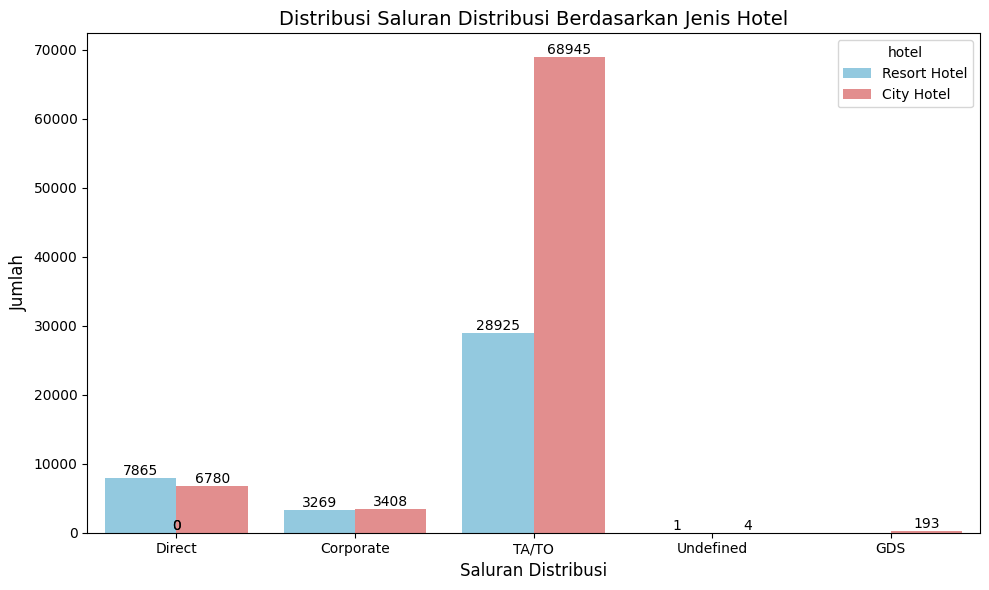

In [ ]:
# Plot distribusi saluran distribusi berdasarkan jenis hotel
plt.figure(figsize=(10, 6))

# Mengatur palet warna untuk per hotel
color_map = {'Resort Hotel': 'skyblue', 'City Hotel': 'lightcoral'}  # Ganti dengan warna sesuai kebutuhan
ax = sns.countplot(x='distribution_channel', hue='hotel', data=df, palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Saluran Distribusi Berdasarkan Jenis Hotel', fontsize=14)
plt.xlabel('Saluran Distribusi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Melihat dari hasil diatas bisa di simpulkan bahwasannya baik di resort maupun city hotel kebanyakan memsana lewat TA/TO diikuti direct dan corporate.

## 6.Tipe Jenis Pemesanan

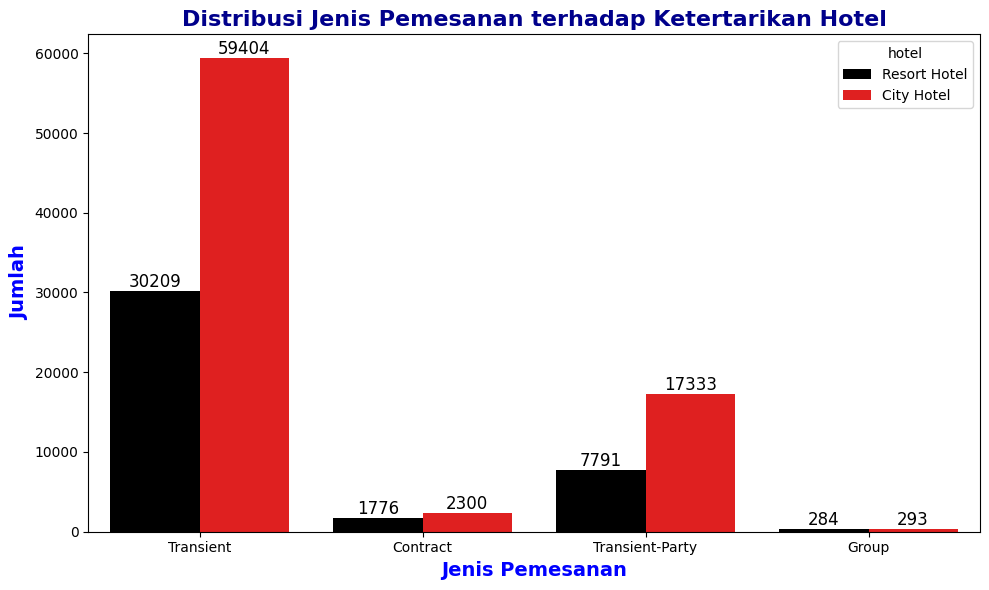

In [ ]:
# Plot distribusi jenis pemesanan terhadap ketertarikan hotel
plt.figure(figsize=(10, 6))

# Mengatur palet warna yang berbeda agar lebih kontras
color_map = ['black', 'red']
ax = sns.countplot(data=df, x='customer_type', hue='hotel', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan judul dan label dengan ukuran dan warna yang berbeda
plt.title('Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Jenis Pemesanan', fontsize=14, weight='bold', color='blue')
plt.ylabel('Jumlah', fontsize=14, weight='bold', color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan Chart tersebut kebanyakan pengunjung hotel tidak terikat kontrak dengan pengunjung lainnya.

## 7.Status Reservasi

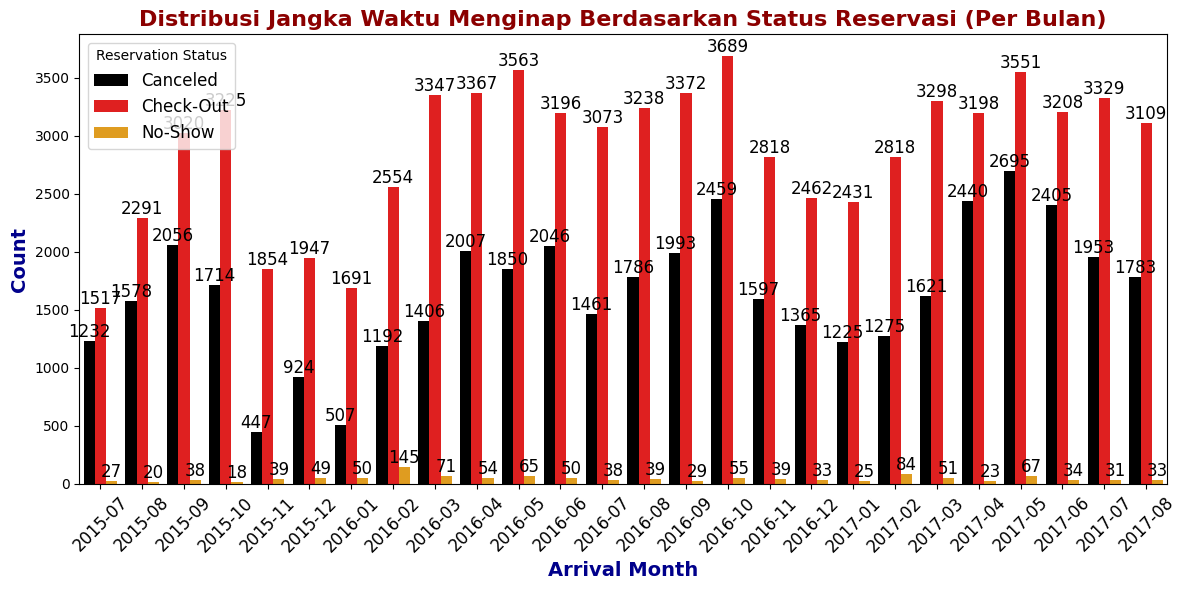

In [ ]:
# Mengonversi kolom tanggal
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# Menambahkan kolom bulan sebagai pengelompokan
df['arrival_month'] = df['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan
status_count = df.groupby(['arrival_month', 'reservation_status']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
# Mengatur palet warna hitam dan merah
color_map = ['black', 'red', 'orange']
ax = sns.barplot(data=status_count, x='arrival_month', y='count', hue='reservation_status', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan judul dan label dengan ukuran dan warna yang lebih kontras
plt.title('Distribusi Jangka Waktu Menginap Berdasarkan Status Reservasi (Per Bulan)', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Arrival Month', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Count', fontsize=14, weight='bold', color='darkblue')

# Rotasi sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, fontsize=12)

# Menambahkan legenda dengan title dan ukuran font
plt.legend(title='Reservation Status', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.tight_layout()
plt.show()


Jika dilihat sekilas semakin menyimpulkan bahwasannya menuju akhir tahun terdapat penurunan pengunjung.

## 8.Pengunjung tahunan

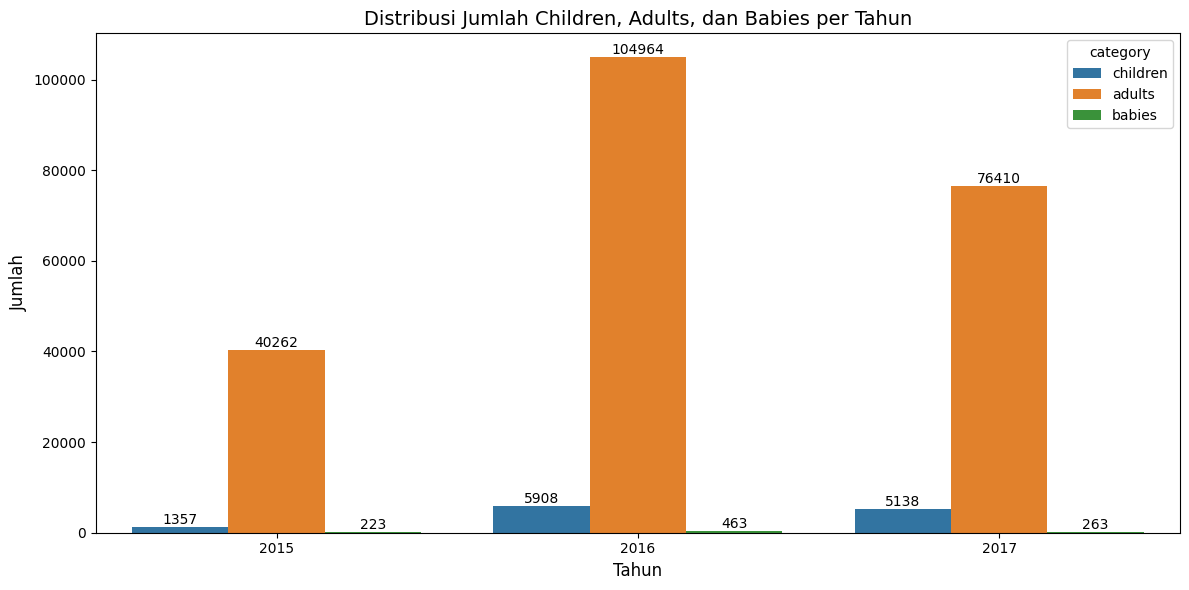

In [ ]:
# Menambahkan kolom tahun berdasarkan 'arrival_date' (asumsi kolom 'arrival_date' sudah ada)
df['arrival_date_year'] = df['arrival_date'].dt.year

# Mengelompokkan berdasarkan tahun dan kategori (children, adults, babies)
yearly_distribution = df.groupby('arrival_date_year')[['children', 'adults', 'babies']].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat barplot
sns.barplot(data=yearly_distribution.melt(id_vars='arrival_date_year', var_name='category', value_name='count'),
            x='arrival_date_year', y='count', hue='category')

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Children, Adults, dan Babies per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.tight_layout()
plt.show()

Bisa dipastikan bahwa kebanyakan pengunjung tidak membawa anak pada saat reservasi hotel, hal itu diperkuat dengan data diatas bahwasannya bar childern bahkan tidak ada setengah dari bar adults.

## 9.Pengunjung bulanan

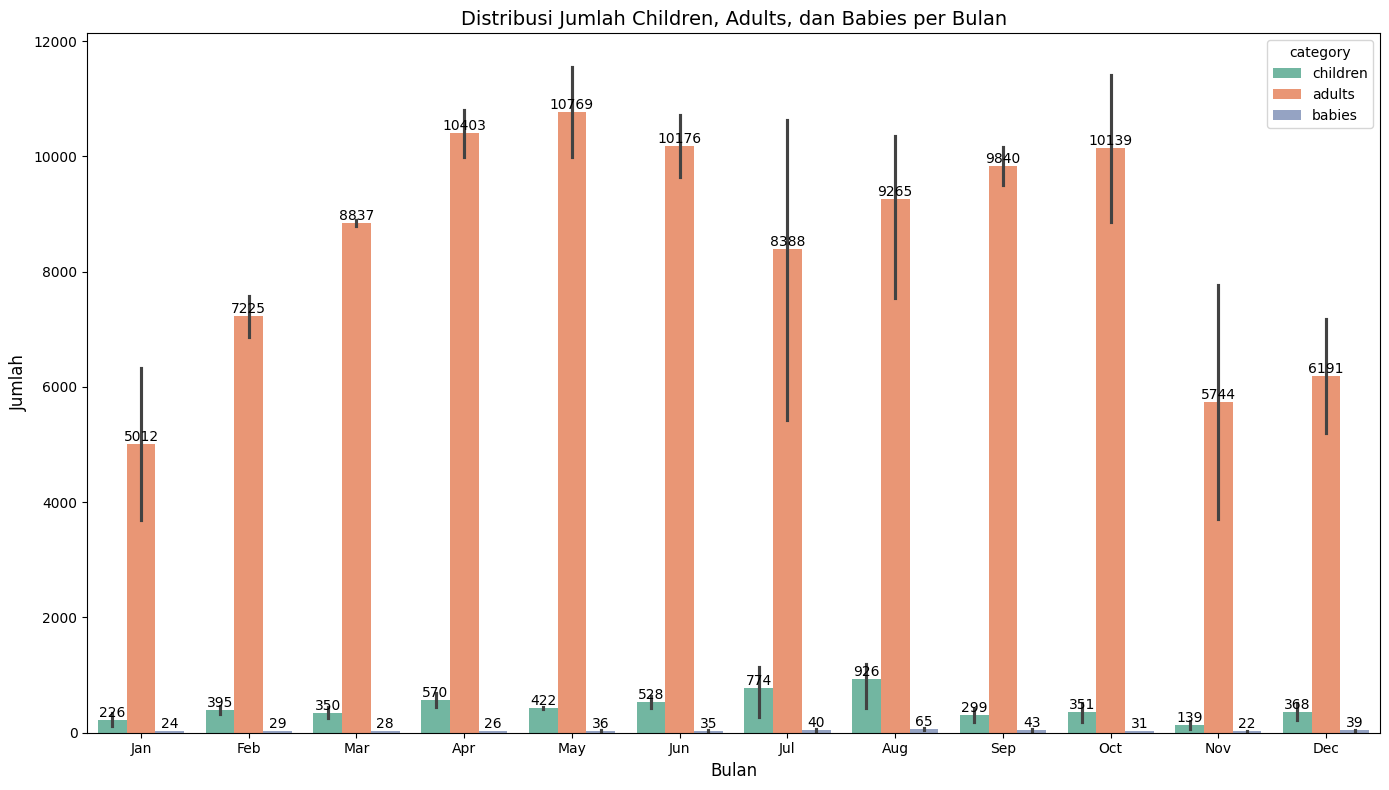

In [ ]:
# Menambahkan kolom bulan dan tahun berdasarkan 'arrival_date' (asumsi kolom 'arrival_date' sudah ada)
df['arrival_date_month'] = df['arrival_date'].dt.month
df['arrival_date_year'] = df['arrival_date'].dt.year

# Mengelompokkan berdasarkan bulan, tahun dan kategori (children, adults, babies)
monthly_distribution = df.groupby(['arrival_date_year', 'arrival_date_month'])[['children', 'adults', 'babies']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 8))

# Menggunakan seaborn untuk membuat barplot
sns.barplot(data=monthly_distribution.melt(id_vars=['arrival_date_year', 'arrival_date_month'], var_name='category', value_name='count'),
            x='arrival_date_month', y='count', hue='category', palette="Set2")

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Children, Adults, dan Babies per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyesuaikan tampilan bulan
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menyusun tata letak agar lebih rapih
plt.tight_layout()
plt.show()

Dengan Diagram ini semakin bisa menyimpulkan jika lebih dari setengah pengunjung tidak membawa atau tidak memiliki anak.

## 10.Jenis Kedatangan

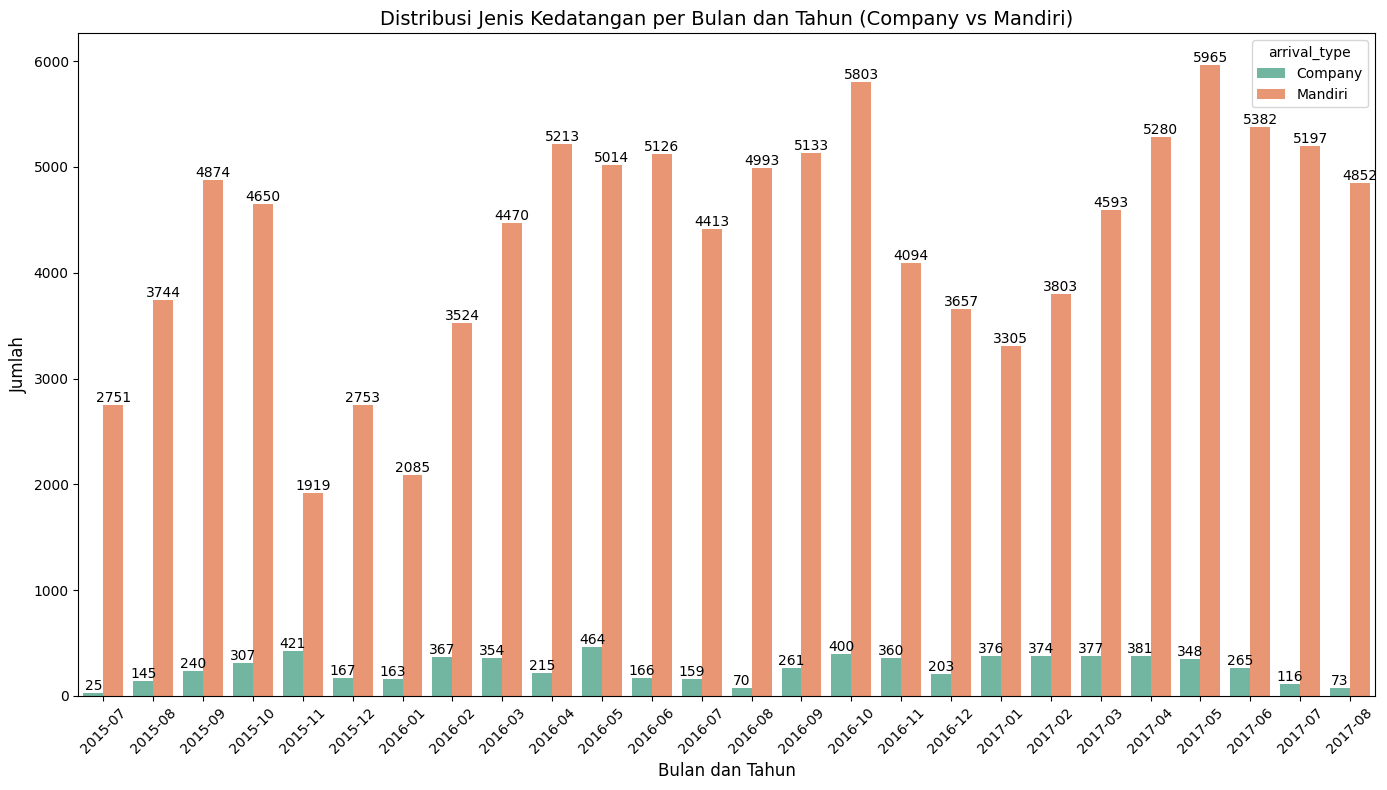

In [ ]:
# Membuat kolom baru berdasarkan kriteria: 999 adalah mandiri, selain itu company
df['arrival_type'] = df['company'].apply(lambda x: 'Mandiri' if x == 999 else 'Company')

# Menambahkan kolom bulan dan tahun berdasarkan 'arrival_date' (asumsi kolom 'arrival_date' sudah ada)
df['arrival_month_year'] = df['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan dan tahun

# Mengelompokkan data per bulan dan tahun dan jenis kedatangan
monthly_distribution = df.groupby(['arrival_month_year', 'arrival_type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 8))

# Menggunakan seaborn untuk membuat barplot
sns.barplot(data=monthly_distribution, x='arrival_month_year', y='count', hue='arrival_type', palette="Set2")

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Kedatangan per Bulan dan Tahun (Company vs Mandiri)', fontsize=14)
plt.xlabel('Bulan dan Tahun', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bisa di lihat jika kedatangan para pengunjung kebanyakan karena keinginan atau rencana sendiri bukan karena perusahaan.

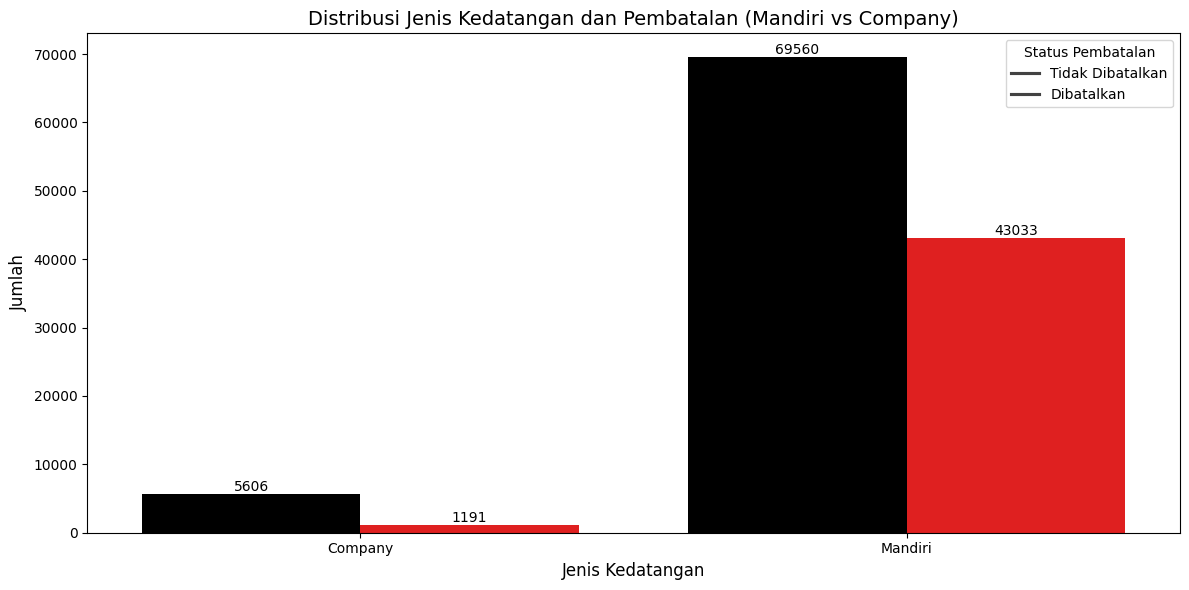

In [ ]:
# Membuat kolom baru berdasarkan nilai company
df['arrival_company_type'] = df['company'].apply(lambda x: 'Mandiri' if x == 999 else 'Company')

# Mengelompokkan data berdasarkan arrival_company_type dan is_canceled
company_canceled_distribution = df.groupby(['arrival_company_type', 'is_canceled']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat barplot dengan pengaturan warna
color_map = {0: 'black', 1: 'red'}  # Mengatur warna untuk is_canceled
sns.barplot(data=company_canceled_distribution, x='arrival_company_type', y='count', hue='is_canceled', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Kedatangan dan Pembatalan (Mandiri vs Company)', fontsize=14)
plt.xlabel('Jenis Kedatangan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.tight_layout()
plt.show()


Dengan diagram seperti diatas bisa disimpulkan bahwa yang sering membatalkan reservasi yaitu dengan jenis kedatangan secara mandiri

## 11.Tipe cara Kedatangan

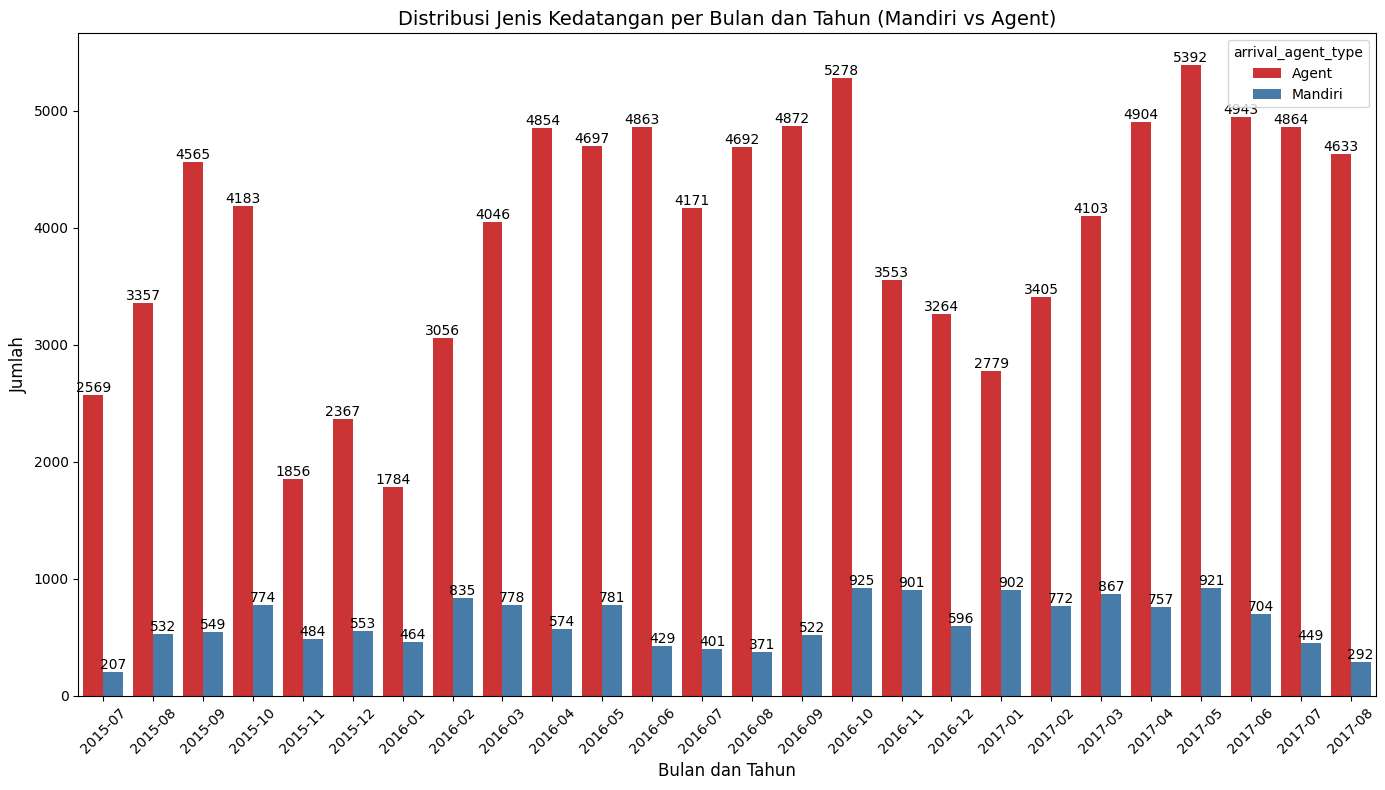

In [ ]:
# Membuat kolom baru berdasarkan nilai agent
df['arrival_agent_type'] = df['agent'].apply(lambda x: 'Mandiri' if x == 999 else 'Agent')

# Menambahkan kolom bulan dan tahun berdasarkan 'arrival_date'
df['arrival_month_year'] = df['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan dan tahun

# Mengelompokkan data per bulan dan tahun dan jenis kedatangan (Mandiri vs Agent)
monthly_agent_distribution = df.groupby(['arrival_month_year', 'arrival_agent_type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 8))

# Menggunakan seaborn untuk membuat barplot
sns.barplot(data=monthly_agent_distribution, x='arrival_month_year', y='count', hue='arrival_agent_type', palette="Set1")

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Kedatangan per Bulan dan Tahun (Mandiri vs Agent)', fontsize=14)
plt.xlabel('Bulan dan Tahun', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Untuk tipe kedatangan para pengunjung, kebanyakan pada lewat agent daripada reservasi sendiri.

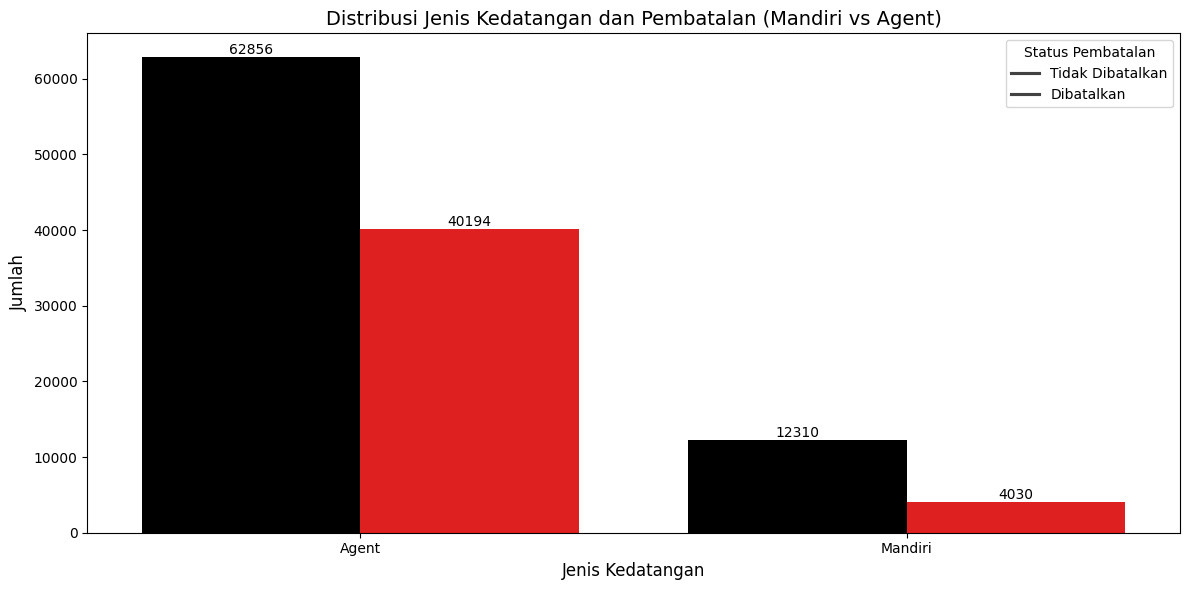

In [ ]:
# Membuat kolom baru berdasarkan nilai agent
df['arrival_agent_type'] = df['agent'].apply(lambda x: 'Mandiri' if x == 999 else 'Agent')

# Mengelompokkan data berdasarkan arrival_agent_type dan is_canceled
agent_canceled_distribution = df.groupby(['arrival_agent_type', 'is_canceled']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat barplot dengan pengaturan warna
color_map = {0: 'black', 1: 'red'}  # Mengatur warna untuk is_canceled
sns.barplot(data=agent_canceled_distribution, x='arrival_agent_type', y='count', hue='is_canceled', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Kedatangan dan Pembatalan (Mandiri vs Agent)', fontsize=14)
plt.xlabel('Jenis Kedatangan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.tight_layout()
plt.show()

Untuk hasil dari gambar diatas bisa disimpulkan bahwa lebih banyak orang yang membatalkan reservasi melalui agent

## 12.Tipe kunjungan datang

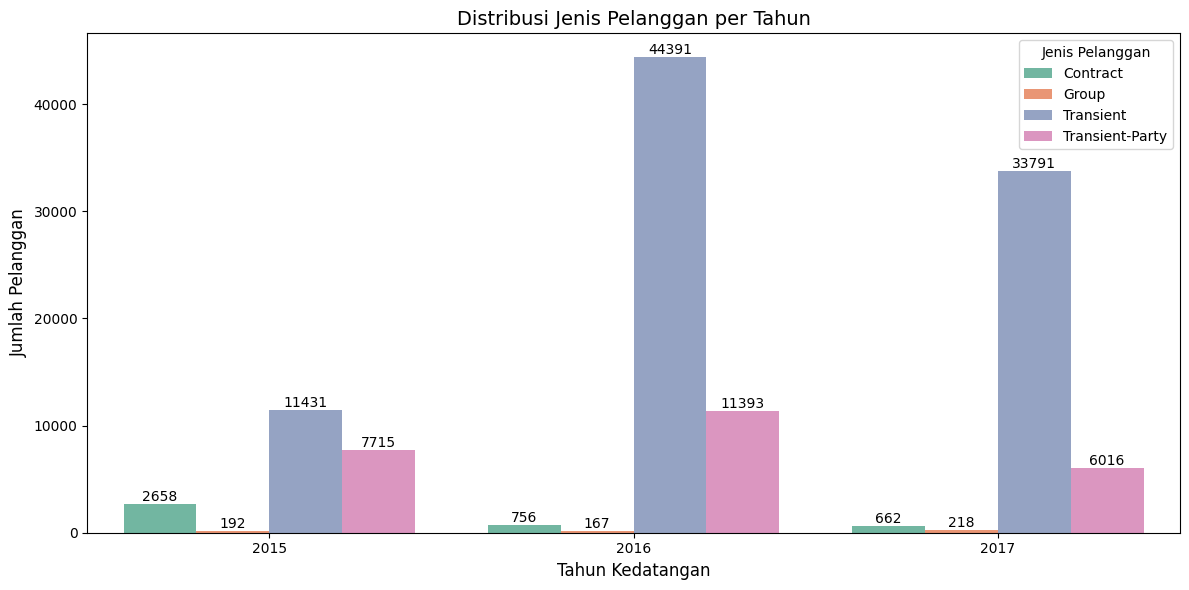

In [ ]:
# Membuat kolom tahun berdasarkan kolom arrival_date
df['arrival_year'] = df['arrival_date'].dt.year

# Mengelompokkan data berdasarkan arrival_year dan customer_type
customer_type_per_year = df.groupby(['arrival_year', 'customer_type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat barplot dengan pengaturan warna
sns.barplot(data=customer_type_per_year, x='arrival_year', y='count', hue='customer_type', palette='Set2')

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Pelanggan per Tahun', fontsize=14)
plt.xlabel('Tahun Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menyusun tata letak agar lebih rapih
plt.legend(title='Jenis Pelanggan')
plt.tight_layout()
plt.show()

Jenis pelanggan terbanyak yang melakukan reservasi di hotel tersebut yaitu transient, bisa kita dilihat didalam gambar diatas yang menunjukan bahwa selama 3 tahun yang paling banyak jenis pelanggan transient

# "Machine Learning"

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Latih model RandomForest
rf_classifier.fit(X_train, y_train)

# Latih model DecisionTree
dt_classifier.fit(X_train, y_train)

# Latih model XGBoost
xgb_classifier.fit(X_train, y_train)

# Prediksi dengan masing-masing model
rf_pred = rf_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
xgb_pred = xgb_classifier.predict(X_test)

# Evaluasi akurasi dan laporan klasifikasi
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Classification report untuk masing-masing model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
XGBoost Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      89

Untuk hasil klasifikasi report dari ke-3 algoritma tersebut memiliki accuracy sama baiknya yaitu mencapai 100 persen


Random Forest Confusion Matrix:
[[14907     0]
 [    0  8971]]

Decision Tree Confusion Matrix:
[[14907     0]
 [    0  8971]]

XGBoost Confusion Matrix:
[[14907     0]
 [    0  8971]]


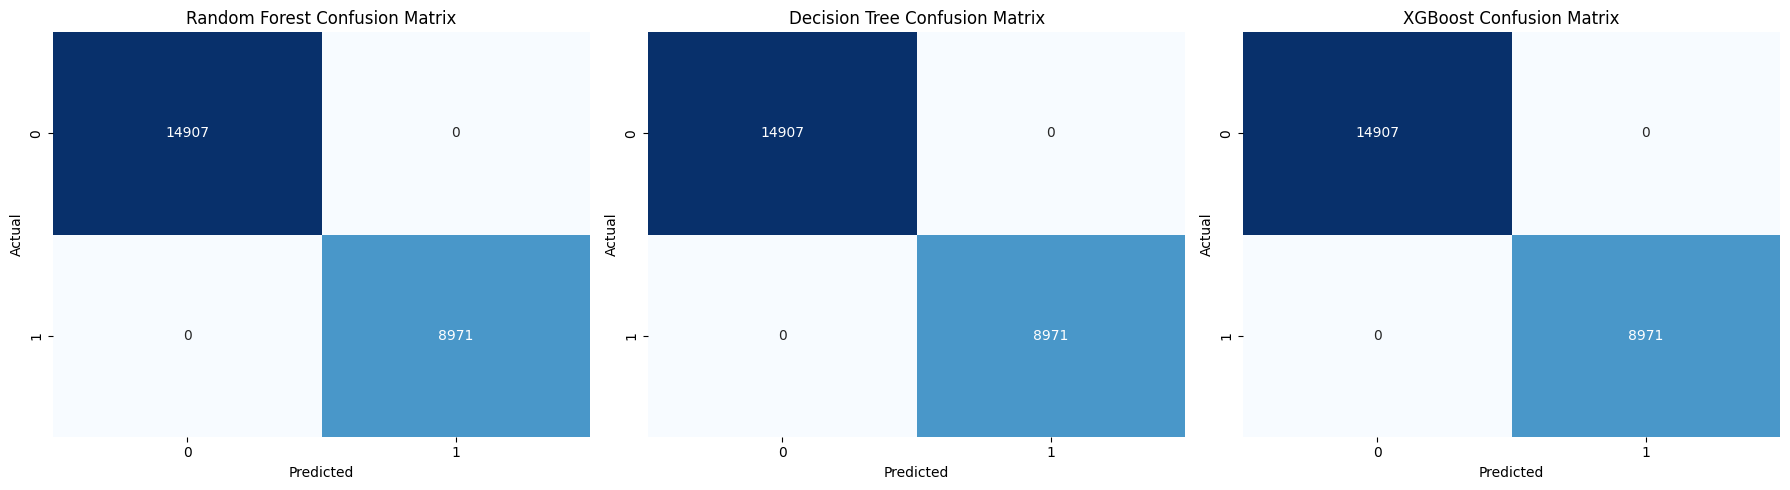


Random Forest Feature Importance:
hotel: 0.0018050845831510368
lead_time: 0.02941864286252754
arrival_date_year: 0.004522158382517477
arrival_date_month: 0.002145975315053279
arrival_date_week_number: 0.005145582356403837
arrival_date_day_of_month: 0.0026745311308485004
stays_in_weekend_nights: 0.0016971440944100959
stays_in_week_nights: 0.0030181941351214744
adults: 0.0012899445383865449
children: 0.0005263451665100842
babies: 5.961036698590575e-05
meal: 0.0010176649430591231
country: 0.040509096424214644
market_segment: 0.01877624740453656
distribution_channel: 0.004698610412417285
is_repeated_guest: 0.0006638489268666949
previous_cancellations: 0.017822949341095743
previous_bookings_not_canceled: 0.0014330850874131418
reserved_room_type: 0.0015714645839067355
assigned_room_type: 0.004852165789249462
booking_changes: 0.006031118346604725
deposit_type: 0.07587319948189707
agent: 0.010072905682472892
company: 0.0008932666831257719
days_in_waiting_list: 0.00043661214182053477
customer_

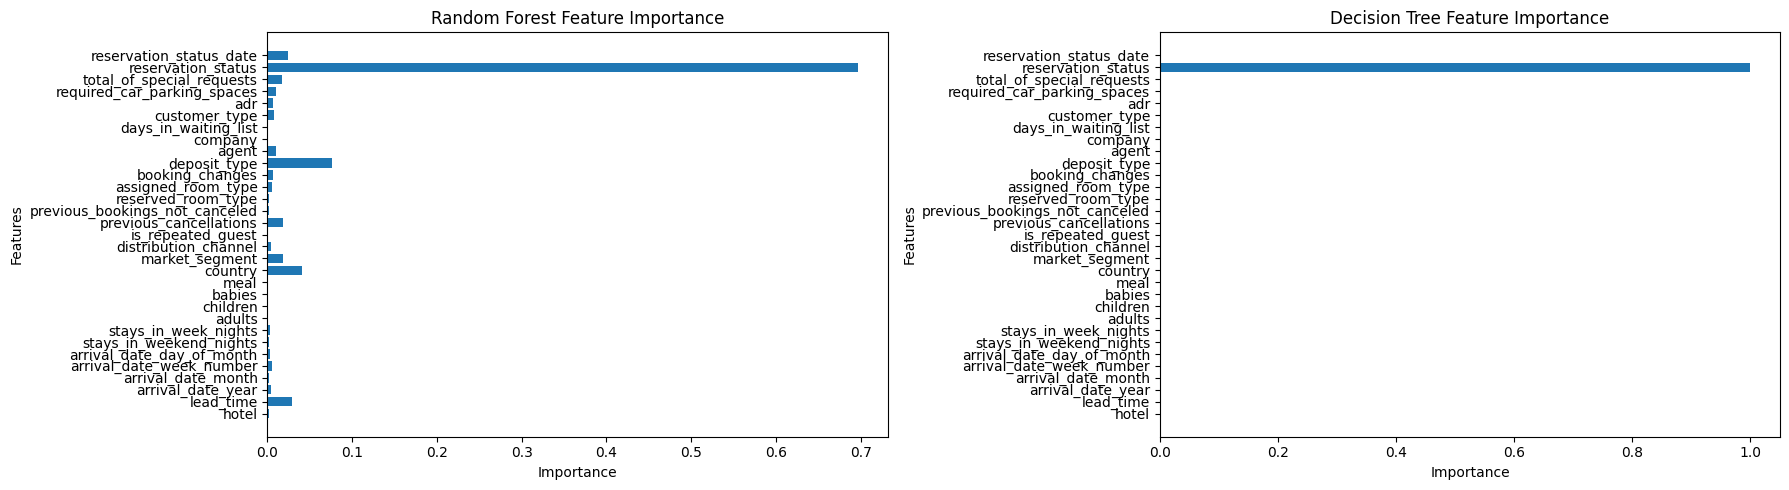

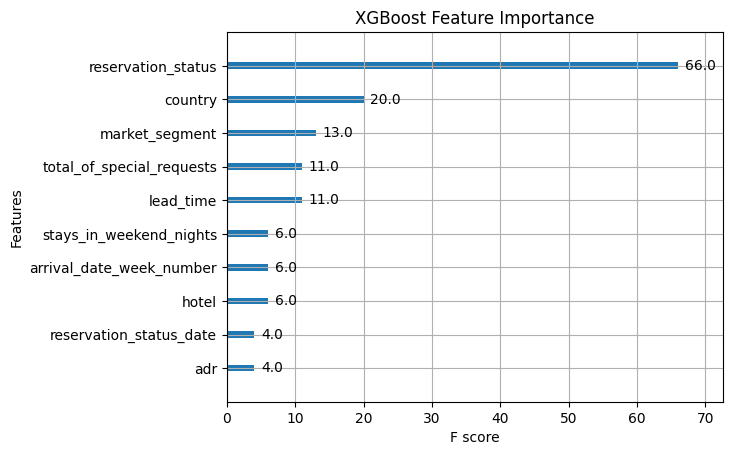

In [ ]:
# --- Confusion Matrix ---
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Print Confusion Matrix for each model
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

print("\nDecision Tree Confusion Matrix:")
print(dt_cm)

print("\nXGBoost Confusion Matrix:")
print(xgb_cm)

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# XGBoost
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[2], cbar=False)
axes[2].set_title('XGBoost Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# --- Feature Importance ---
# Random Forest Feature Importance
rf_importance = rf_classifier.feature_importances_

# Decision Tree Feature Importance
dt_importance = dt_classifier.feature_importances_

# XGBoost Feature Importance
xgb_importance = xgb_classifier.feature_importances_

# Print Feature Importance for Random Forest and Decision Tree
print("\nRandom Forest Feature Importance:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {rf_importance[i]}")

print("\nDecision Tree Feature Importance:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {dt_importance[i]}")

# Plot Feature Importance for Random Forest and Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Random Forest Feature Importance Plot
axes[0].barh(range(len(rf_importance)), rf_importance)
axes[0].set_yticks(range(len(rf_importance)))
axes[0].set_yticklabels(X_train.columns)
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Features')

# Decision Tree Feature Importance Plot
axes[1].barh(range(len(dt_importance)), dt_importance)
axes[1].set_yticks(range(len(dt_importance)))
axes[1].set_yticklabels(X_train.columns)
axes[1].set_title('Decision Tree Feature Importance')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Features')

plt.tight_layout()
plt.show()

# XGBoost Feature Importance Plot
xgb.plot_importance(xgb_classifier, importance_type='weight', max_num_features=10, title='XGBoost Feature Importance')
plt.show()

Meskipun ke-3 algoritma tersebut memiliki accuracy sama baiknya, tetapi setiap algoritma menggunakan jumlah feature yang berbeda.

# "Hasil dan Pembasan"

##  hasil

### XGB

Interpretasi Hasil
1.	reservation_status (66.0)
o	Dominan seperti pada Random Forest dan Decision Tree.
o	Status reservasi adalah indikator utama yang digunakan XGBoost untuk membuat keputusan prediksi.
2.	country (20.0)
o	Kontribusi yang cukup besar menunjukkan bahwa lokasi asal tamu memengaruhi prediksi (mungkin berkaitan dengan preferensi tamu dari negara tertentu).
3.	market_segment (13.0)
o	Segmentasi pasar memberikan informasi penting tentang kelompok pemesanan (misalnya individu atau grup).
4.	total_of_special_requests (11.0) dan lead_time (11.0)
o	Keduanya menggambarkan perilaku tamu: banyaknya permintaan khusus dan jarak waktu pemesanan sebelum kedatangan.
5.	stays_in_weekend_nights (6.0), arrival_date_week_number (6.0), dan hotel (6.0)
o	Fitur dengan kontribusi moderat yang mungkin relevan untuk pola pemesanan atau preferensi lokasi hotel.
6.	reservation_status_date (4.0) dan adr (4.0)
o	Kontribusi kecil tetapi tetap relevan, seperti tanggal status reservasi dan nilai rata-rata pendapatan per kamar.


### DT

Penjelasan Mengenai Decision Tree Feature Importance
Berdasarkan hasil Decision Tree Feature Importance, hanya terdapat satu fitur yang memiliki kontribusi, yaitu reservation_status. Berikut adalah analisis lebih lanjut:
Penjelasan Detail
1.	reservation_status (1.0)
o	Fitur ini memiliki nilai importance 1.0, artinya 100% pengaruh keputusan dalam model Decision Tree bergantung pada fitur ini.
o	reservation_status mencerminkan status akhir dari reservasi (misalnya, dikonfirmasi, dibatalkan, atau tidak hadir). Karena ini adalah faktor penentu utama dalam dataset, model sepenuhnya bergantung pada fitur ini untuk membuat keputusan.
2.	Fitur-Fitur Lain (0.0)
o	Semua fitur selain reservation_status memiliki nilai importance 0.0, menunjukkan bahwa model tidak menggunakan fitur-fitur tersebut untuk membuat keputusan.
o	Hal ini dapat terjadi karena fitur-fitur lain tidak memberikan informasi tambahan yang relevan atau karena data sangat bergantung pada satu fitur yang dominan.
Analisis
•	Kelebihan:
o	Decision Tree sederhana dan langsung menggunakan fitur yang paling relevan untuk membuat keputusan, sehingga mudah diinterpretasikan.
•	Kekurangan:
o	Ketergantungan penuh pada satu fitur dapat menjadi kelemahan jika fitur tersebut memiliki bias atau data hilang. Model menjadi kurang robust dan tidak memanfaatkan informasi tambahan yang mungkin ada di fitur lain.


### RF


Feature importance dalam Random Forest adalah nilai yang menggambarkan seberapa besar kontribusi setiap fitur dalam membantu model membuat prediksi. Semakin tinggi nilai importance, semakin besar pengaruh fitur tersebut terhadap model.
Top 10 Fitur Penting
1.	reservation_status (69.68%)
o	Fitur ini paling berpengaruh karena menggambarkan status akhir reservasi (dikonfirmasi, dibatalkan, atau tidak hadir). Status ini sangat penting untuk menentukan hasil prediksi terkait data hotel.
2.	deposit_type (7.59%)
o	Jenis deposit memberikan pengaruh besar karena menunjukkan apakah tamu membayar deposit, tidak ada deposit, atau pembayaran dilakukan penuh di muka.
3.	country (4.05%)
o	Negara asal tamu dapat memengaruhi pola reservasi, termasuk durasi menginap dan kemungkinan pembatalan.
4.	lead_time (2.94%)
o	Waktu antara pemesanan dan kedatangan tamu juga signifikan dalam memprediksi perilaku reservasi.
5.	reservation_status_date (2.44%)
o	Tanggal status reservasi memberikan informasi waktu kapan perubahan status reservasi terjadi, yang relevan untuk memahami pola waktu.
6.	market_segment (1.88%)
o	Segmentasi pasar menentukan asal tamu (misalnya, grup turis, perusahaan, atau individu), yang berdampak pada pola reservasi.
7.	previous_cancellations (1.78%)
o	Riwayat pembatalan sebelumnya dapat menjadi indikator penting untuk memprediksi apakah reservasi saat ini akan dibatalkan.
8.	total_of_special_requests (1.74%)
o	Jumlah permintaan khusus mencerminkan kebutuhan spesifik tamu, yang bisa menjadi indikator keterlibatan atau kepuasan mereka.
9.	agent (1.01%)
o	Kode agen yang memproses reservasi memberikan gambaran tentang pola booking melalui agen tertentu.
10.	required_car_parking_spaces (0.99%)
•	Jumlah tempat parkir yang diminta bisa menjadi indikator preferensi tamu, terutama untuk tamu lokal atau yang datang dengan kendaraan pribadi.


## Pembahasan

Dari ketiga algoritma yang digunakan, *reservation_status* muncul sebagai fitur paling penting dalam semua model. Dalam Random Forest, fitur ini memiliki kontribusi terbesar sebesar 69,68%, diikuti oleh *deposit_type* (7,59%) dan *country* (4,05%). Pada Decision Tree, *reservation_status* memiliki kontribusi penuh (nilai 1.0), sedangkan pada XGBoost, *reservation_status* tetap menjadi yang paling dominan dengan nilai 66,0, diikuti oleh *country* (20,0) dan *market_segment* (13,0). Meskipun ketiga algoritma menunjukkan pentingnya *reservation_status*, model XGBoost mengakui kontribusi fitur tambahan seperti *country* dan *market_segment*, sementara Decision Tree sangat bergantung pada fitur ini saja. Random Forest memberikan kontribusi yang lebih merata antara beberapa fitur, namun *reservation_status* tetap menjadi faktor utama dalam ketiga model tersebut.

</br>

Penelitian ini menganalisis kontribusi fitur dalam prediksi data hotel menggunakan tiga algoritma machine learning: Random Forest, Decision Tree, dan XGBoost. Secara keseluruhan dari ketiga algoritma yang diuji, reservation_status muncul sebagai fitur paling dominan, memberikan kontribusi besar terhadap prediksi perilaku reservasi tamu dalam seluruh model. Meskipun ketiga model menilai reservation_status sebagai fitur utama, hasil analisis juga menunjukkan bahwa algoritma seperti XGBoost dan Random Forest mampu mengidentifikasi lebih banyak fitur relevan yang memengaruhi prediksi. Hal ini menunjukkan kompleksitas data yang lebih baik ditangani oleh model yang lebih fleksibel seperti Random Forest dan XGBoost dibandingkan dengan Decision Tree yang cenderung bergantung pada satu fitur dominan.

# "Knowledge Interpretation"

Berdasar kan hasil dari Ketiga algoritma yang dipakai yaitu XGBoost, Decission tree, dan random forest. Kesemuanya memiliki akurasi maksimal, yang membedakan yaitu fitur fitur yang mempengaruhi hasil tersebut. Untuk kesemuanya ***reservation_status*** menjadi yang utama dikarenakan memang atribut tersebut berbanding lurus dengan keputan pengunjung karena atribut ini merupakan Status reservasi, seperti Canceled (dibatalkan), Check-Out (tamu telah check-out), atau No-Show (tamu tidak hadir), ada juga fitur fitur yang cukup berpengaruh lainnya yaitu :

1. country
2. deposit_type
3. market_segment
4. lead time

## Country

country - Negara asal pelanggan dalam format ISO 3155–3:2013.

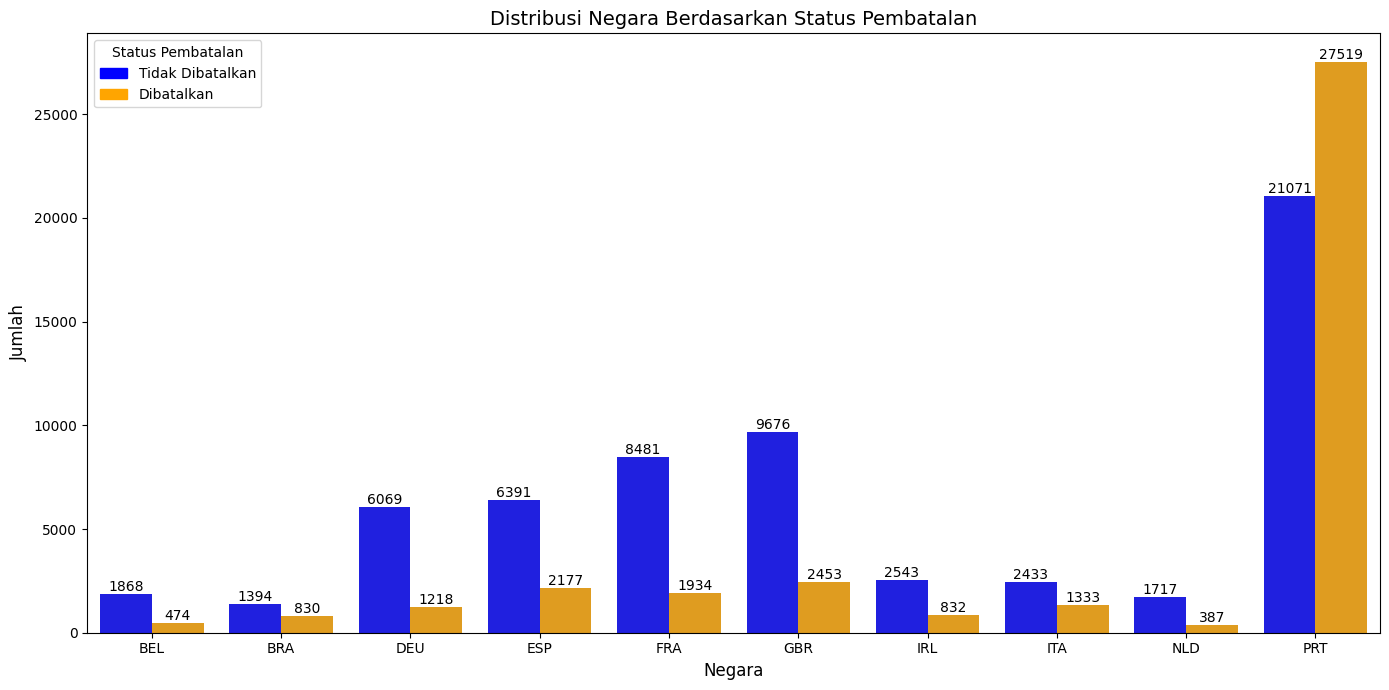

In [ ]:
# Mengelompokkan data berdasarkan country dan is_canceled
country_canceled_distribution = df.groupby(['country', 'is_canceled']).size().reset_index(name='count')

# Memilih hanya negara dengan kontribusi besar (misalnya top 10 berdasarkan jumlah total)
top_countries = (
    country_canceled_distribution.groupby('country')['count']
    .sum()
    .nlargest(10)
    .index
)
filtered_data = country_canceled_distribution[country_canceled_distribution['country'].isin(top_countries)]

# Plot
plt.figure(figsize=(14, 7))

# Membuat barplot dengan warna berbeda untuk is_canceled
palette = {0: 'blue', 1: 'orange'}  # Warna untuk is_canceled
sns.barplot(data=filtered_data, x='country', y='count', hue='is_canceled', palette=palette)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Negara Berdasarkan Status Pembatalan', fontsize=14)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Membuat legenda dengan warna
from matplotlib.patches import Patch
legend_handles = [Patch(color='blue', label='Tidak Dibatalkan'),
                  Patch(color='orange', label='Dibatalkan')]
plt.legend(handles=legend_handles, title='Status Pembatalan')

# Menyusun tata letak agar lebih rapi
plt.tight_layout()
plt.show()


Dapat disimpulkan bahwa negara Portugal (PRT) memiliki tingkat pembatalan yang sangat tinggi dibandingkan dengan negara-negara lainnya. Di sisi lain, negara-negara seperti Prancis (FRA), Inggris (GBR), Spanyol (ESP), Jerman (DEU), Irlandia (IRL), Italia (ITA), Belanda (NLD), Brasil (BRA), dan Belgia (BEL) menunjukkan angka pembatalan yang lebih rendah jika dibandingkan dengan yang tidak dibatalkan. </br></br>

Strategi Pemasaran untuk Portugal (PRT):

* Mungkin perlu ada pendekatan pemasaran yang lebih intensif untuk mengurangi tingkat pembatalan di Portugal, seperti memberikan insentif bagi pelanggan untuk tidak membatalkan, seperti penawaran diskon atau promosi eksklusif.
* Menyusun ulang kebijakan pembayaran atau deposit untuk mendorong komitmen lebih awal dari pelanggan di Portugal.
 </br></br>

Strategi Pemasaran untuk Negara-negara dengan Pembatalan Lebih Rendah:

* Negara-negara seperti Prancis, Inggris, Spanyol, dan lainnya yang memiliki pembatalan lebih rendah bisa diperlakukan dengan pendekatan yang berbeda. Misalnya, Anda bisa meningkatkan upaya pemasaran untuk meningkatkan loyalitas pelanggan di negara-negara ini, atau menyesuaikan layanan untuk menyesuaikan dengan preferensi lokal mereka.

Melakukan analisis lebih mendalam untuk menemukan pola di antara pelanggan dari Portugal, apakah ada faktor tertentu (seperti periode tertentu dalam setahun) yang lebih rentan terhadap pembatalan.

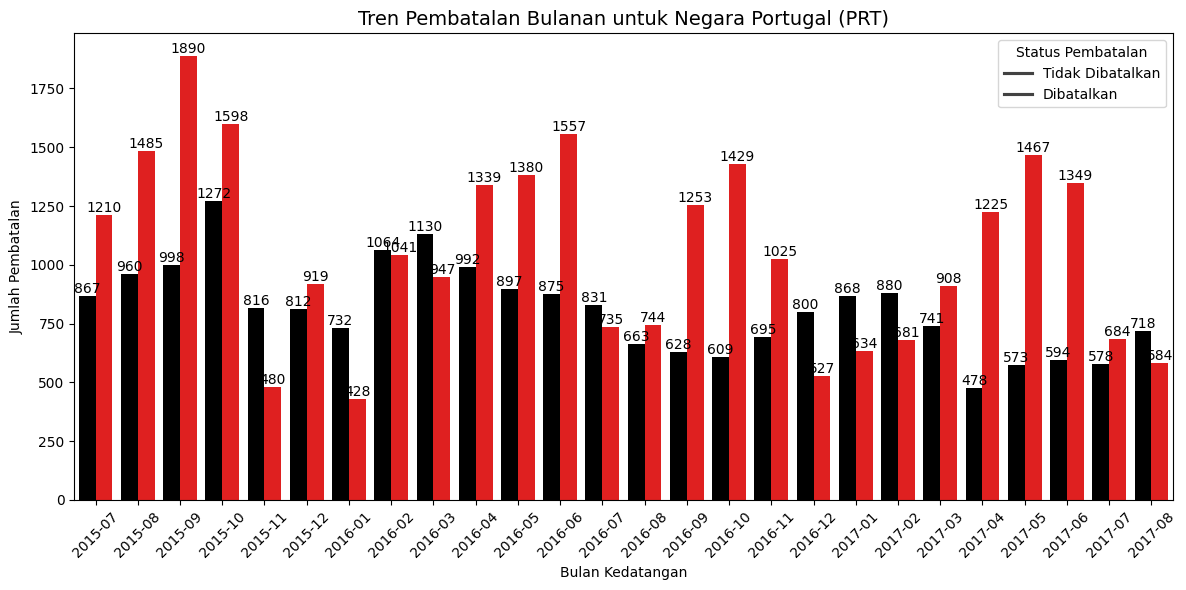

In [ ]:
# Filter data untuk negara Portugal
df_portugal = df[df['country'] == 'PRT']

# Mengonversi kolom tanggal menjadi datetime
df_portugal['arrival_date'] = pd.to_datetime(
    df_portugal['arrival_date_year'].astype(str) + '-' +
    df_portugal['arrival_date_month'].astype(str) + '-' +
    df_portugal['arrival_date_day_of_month'].astype(str),
    format='%Y-%m-%d'
)

# Menambahkan kolom bulan sebagai pengelompokan
df_portugal['arrival_month'] = df_portugal['arrival_date'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan dan status pembatalan
portugal_canceled_trends = df_portugal.groupby(['arrival_month', 'is_canceled']).size().reset_index(name='count')

# Plot tren pembatalan bulanan untuk negara Portugal
plt.figure(figsize=(12, 6))

# Menggunakan seaborn untuk membuat barplot dengan pengaturan warna
color_map = {0: 'black', 1: 'red'}  # Warna untuk pembatalan (Tidak Dibatalkan = hitam, Dibatalkan = merah)
sns.barplot(data=portugal_canceled_trends, x='arrival_month', y='count', hue='is_canceled', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Tren Pembatalan Bulanan untuk Negara Portugal (PRT)', fontsize=14)
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45)
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.tight_layout()
plt.show()

### Analisis Tren Pembatalan dan Tidak Pembatalan untuk Negara Portugal (PRT)

Dari data yang diberikan, berikut adalah analisis tren pembatalan dan tidak pembatalan per bulan di Portugal dari Juli 2015 hingga Agustus 2017:

#### 1. **Kenaikan Pembatalan Secara Umum**:
   - Secara keseluruhan, jumlah pembatalan cenderung meningkat dalam beberapa bulan pertama dari Juli 2015 hingga Maret 2016. Ini dapat dilihat dari bulan-bulan awal yang memiliki jumlah pembatalan yang lebih tinggi daripada jumlah yang tidak dibatalkan.
   - Misalnya, pada bulan **2015-07**, pembatalan (1210) lebih tinggi daripada yang tidak dibatalkan (867), dan tren ini berlanjut hingga **2016-03**.
   
#### 2. **Penurunan Pembatalan pada 2016-11 dan 2016-12**:
   - Pada **2016-11** dan **2016-12**, ada penurunan signifikan dalam pembatalan jika dibandingkan dengan bulan-bulan sebelumnya.
   - **2016-11** menunjukkan pembatalan (480) yang sangat rendah, bahkan lebih rendah daripada jumlah yang tidak dibatalkan (816), menunjukkan bahwa banyak pelanggan yang tidak membatalkan reservasi mereka.
   - **2016-12** juga memiliki jumlah pembatalan (919) yang lebih rendah dari bulan-bulan sebelumnya, meskipun masih lebih tinggi dibandingkan yang tidak dibatalkan (812). Hal ini mungkin menunjukkan adanya faktor musiman atau promosi yang mengurangi pembatalan.

#### 3. **Peningkatan Pembatalan pada 2017**:
   - Pada tahun **2017**, khususnya bulan-bulan pertama, pembatalan meningkat kembali. Misalnya, **2017-01** dan **2017-02** menunjukkan pembatalan yang lebih tinggi daripada bulan-bulan sebelumnya (634 dan 681).
   - Pembatalan mencapai angka tertinggi pada **2017-05** (1467), yang menunjukkan bahwa terdapat faktor tertentu yang menyebabkan lonjakan pembatalan pada bulan ini.

#### 4. **Fluktuasi yang Signifikan**:
   - Secara keseluruhan, meskipun ada tren peningkatan dan penurunan, angka pembatalan cenderung berfluktuasi di sekitar angka tertentu.
   - Ada bulan-bulan tertentu dengan jumlah pembatalan yang sangat tinggi, seperti pada **2016-06** (1557) dan **2017-05** (1467), diikuti oleh bulan dengan pembatalan yang lebih rendah.
   
#### 5. **Perbedaan Tren Musiman**:
   - Data ini juga menunjukkan adanya pengaruh musiman terhadap pembatalan. Misalnya, pada **2016-12** dan **2017-08**, pembatalan cenderung lebih rendah, yang mungkin terkait dengan liburan atau periode musim tinggi ketika permintaan lebih stabil.

#### **Kesimpulan**:
- **Tantangan Pembatalan**: Diperlukan strategi untuk mengurangi pembatalan, terutama pada bulan-bulan dengan tingkat pembatalan tinggi. Ini bisa mencakup penawaran diskon atau insentif untuk tidak membatalkan reservasi, serta memperbaiki komunikasi dan layanan pelanggan.
  
- **Pemahaman Musiman**: Analisis musiman penting untuk memahami kapan permintaan dan pembatalan mencapai puncaknya, sehingga dapat mempersiapkan kapasitas dan penawaran dengan lebih baik.

- **Strategi Pemulihan**: Untuk bulan-bulan dengan tingkat pembatalan yang tinggi, perusahaan hotel bisa mempertimbangkan cara untuk memulihkan atau menarik kembali pelanggan yang mungkin batal, seperti menawarkan pengembalian dana parsial atau perubahan tanggal.


## Deposit Type

deposit_type - Jenis deposit: No Deposit (tanpa deposit), Non Refund (deposit penuh), atau Refundable (deposit sebagian).

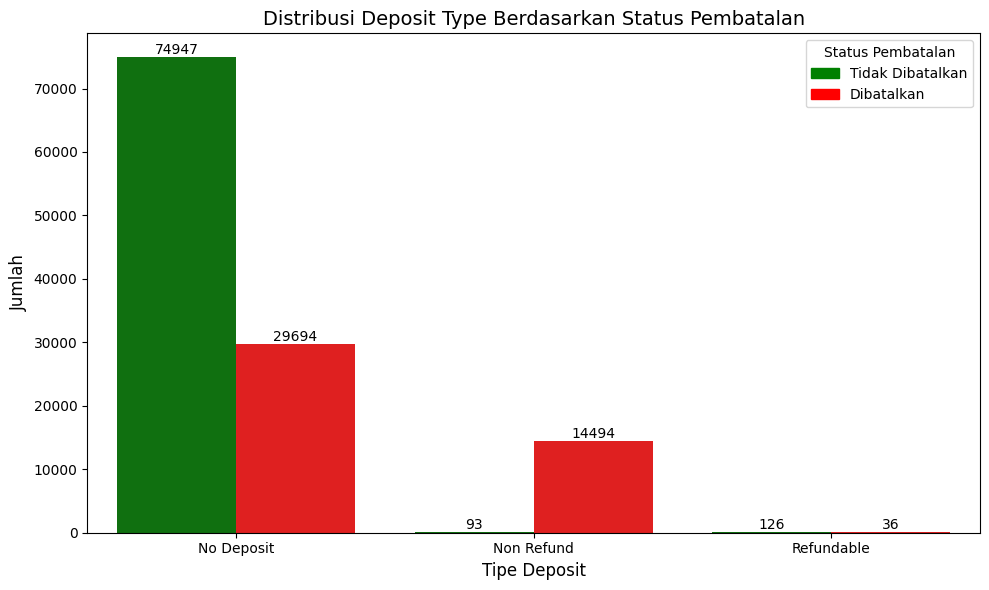

In [ ]:
# Mengelompokkan data berdasarkan deposit_type dan is_canceled
deposit_canceled_distribution = df.groupby(['deposit_type', 'is_canceled']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))

# Membuat barplot dengan warna berbeda untuk is_canceled
palette = {0: 'green', 1: 'red'}  # Warna untuk is_canceled (Tidak Dibatalkan dan Dibatalkan)
sns.barplot(data=deposit_canceled_distribution, x='deposit_type', y='count', hue='is_canceled', palette=palette)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Deposit Type Berdasarkan Status Pembatalan', fontsize=14)
plt.xlabel('Tipe Deposit', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Membuat legenda dengan warna
from matplotlib.patches import Patch
legend_handles = [Patch(color='green', label='Tidak Dibatalkan'),
                  Patch(color='red', label='Dibatalkan')]
plt.legend(handles=legend_handles, title='Status Pembatalan')

# Menyusun tata letak agar lebih rapi
plt.tight_layout()
plt.show()


Berdasarkan data diatas mengenai tipe deposit dan tingkat pembatalan, berikut adalah beberapa keputusan yang dapat diambil sebagai pimpinan hotel:

- **Tingkat Pembatalan**:
  - Tipe deposit **No Deposit** memiliki lebih banyak pengunjung yang tidak membatalkan dibandingkan yang membatalkan.
  - Tipe deposit **Non-Refundable** dan **Refundable** cenderung memiliki lebih banyak pengunjung yang tidak membatalkan dibandingkan yang membatalkan.

### Keputusan yang Dapat Diambil:

1. **Fokus pada Promosi dan Insentif untuk Tipe No Deposit**:
   - **No Deposit** memiliki banyak pengunjung yang tidak membatalkan, jadi ini bisa menjadi opsi yang menarik untuk lebih sering digunakan dalam promosi. Anda bisa mempertimbangkan untuk membuat lebih banyak paket yang menawarkan opsi ini.
   - Memberikan insentif lebih lanjut seperti diskon atau layanan tambahan untuk pengunjung yang memilih tipe **No Deposit**, yang terbukti tidak mudah membatalkan.

2. **Tingkatkan Penawaran Non-Refundable**:
   - Meskipun **Non-Refundable** lebih sedikit digunakan, tipe ini memberikan lebih banyak stabilitas keuangan karena pembayaran tidak dapat dikembalikan. Anda bisa meningkatkan penawaran untuk tipe ini, seperti menawarkan tarif lebih murah untuk tamu yang memilih **Non-Refundable**.
   - Untuk meningkatkan konversi dari **Non-Refundable**, Anda bisa memberikan penawaran spesial seperti tambahan fasilitas atau layanan ekstra.

3. **Perbaiki Kebijakan Refundable**:
   - Mengingat tipe **Refundable** memiliki jumlah pengunjung yang lebih sedikit, ini bisa menunjukkan bahwa orang cenderung lebih memilih opsi **Non-Refundable** atau **No Deposit** karena faktor kenyamanan harga atau kemudahan.
   - Juga mempertimbangkan untuk mempromosikan lebih agresif opsi **Refundable** untuk pengunjung yang membutuhkan lebih banyak fleksibilitas. Mungkin dapat memberikan lebih banyak jaminan atau peningkatan layanan yang dapat menarik lebih banyak pelanggan untuk memilih tipe ini.

4. **Strategi untuk Menurunkan Tingkat Pembatalan pada Tipe Non-Refundable dan Refundable**:
   - Meskipun pembatalan lebih sering terjadi pada tipe **Refundable**, juga bisa menambahkan kebijakan yang memperkecil kemungkinan pembatalan, seperti pengenaan biaya pembatalan atau persyaratan lebih ketat untuk pengembalian uang.
   - Mengingat pembatalan pada **Non-Refundable** dan **Refundable** relatif lebih rendah, memanfaatkan tipe ini untuk membuat kebijakan lebih keras terhadap pembatalan. Memberikan pemahaman yang lebih jelas tentang ketentuan ini di situs web bisa membantu menurunkan pembatalan.


### Kesimpulan:
- **No Deposit** memiliki potensi lebih besar untuk pengunjung yang tidak membatalkan, jadi bisa lebih dipromosikan.
- **Non-Refundable** bisa diperkaya dengan promosi tambahan untuk menarik lebih banyak pengunjung.
- **Refundable** perlu lebih diperkenalkan dengan layanan tambahan untuk membuatnya lebih menarik bagi pelanggan yang membutuhkan fleksibilitas.


## Market Segment

market_segment - Segmen pasar untuk pemesanan

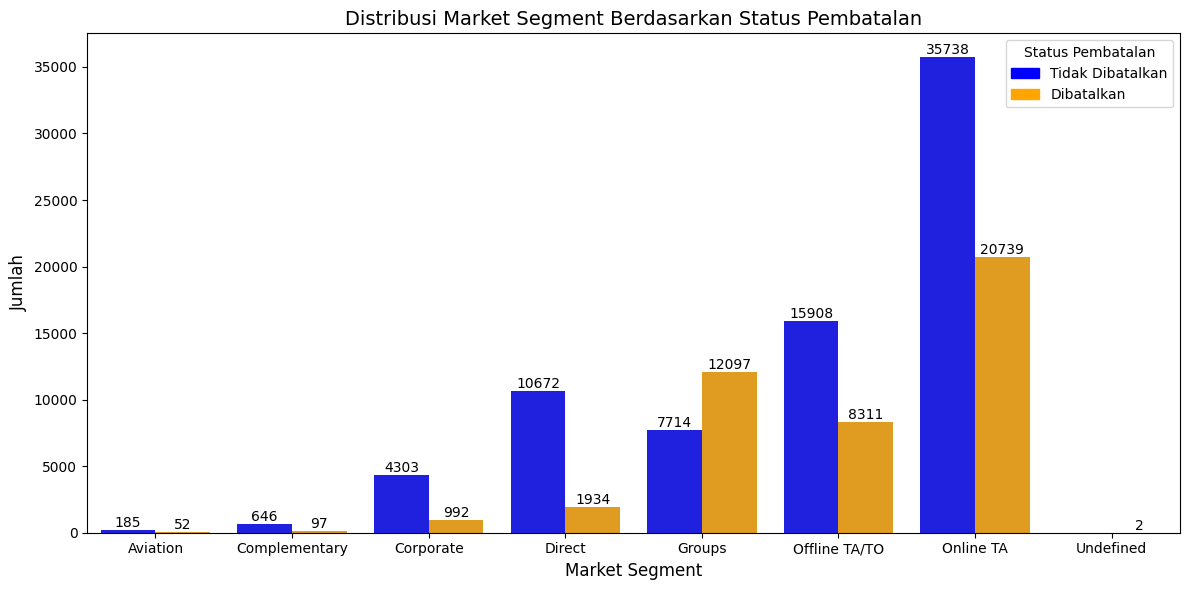

In [ ]:
# Mengelompokkan data berdasarkan market_segment dan is_canceled
market_canceled_distribution = df.groupby(['market_segment', 'is_canceled']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))

# Membuat barplot dengan warna berbeda untuk is_canceled
palette = {0: 'blue', 1: 'orange'}  # Warna untuk is_canceled (Tidak Dibatalkan dan Dibatalkan)
sns.barplot(data=market_canceled_distribution, x='market_segment', y='count', hue='is_canceled', palette=palette)

# Menambahkan total nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',  # Menampilkan nilai
                           (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Market Segment Berdasarkan Status Pembatalan', fontsize=14)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Membuat legenda dengan warna
from matplotlib.patches import Patch
legend_handles = [Patch(color='blue', label='Tidak Dibatalkan'),
                  Patch(color='orange', label='Dibatalkan')]
plt.legend(handles=legend_handles, title='Status Pembatalan')

# Menyusun tata letak agar lebih rapi
plt.tight_layout()
plt.show()


### Market Segment:
  1. **Online TA** (Online Travel Agent) adalah segmen dengan pengunjung terbanyak, diikuti oleh **Offline TA/TO** (Travel Agents / Tour Operators), **Groups**, **Direct**, **Corporate**, **Complementary**, **Aviation**, dan **Undefined**.
  2. **Tingkat Pembatalan**:
     Secara umum, tingkat pembatalan lebih banyak **Tidak Batal** dibandingkan dengan **Batal** pada hampir semua segmen pasar, kecuali pada segmen **Groups** yang menunjukkan lebih banyak pembatalan.

### Keputusan yang Dapat Kami Ambil:

1. **Fokus pada Promosi untuk Segmen Online TA**:
   - **Online TA** memiliki jumlah pengunjung terbanyak dan tingkat pembatalannya relatif rendah. Kami bisa mempertimbangkan untuk menjalin lebih banyak kemitraan dengan agen perjalanan online (OTA) untuk meningkatkan visibilitas hotel dan menarik lebih banyak pengunjung.
   - Menawarkan penawaran khusus atau diskon bagi pengunjung yang memesan melalui OTA dapat memperkuat hubungan kami dengan agen ini dan meningkatkan kedatangan tamu.

2. **Tingkatkan Penawaran untuk Segmen Offline TA/TO**:
   - **Offline TA/TO** memiliki jumlah pengunjung yang signifikan dan tingkat pembatalan yang rendah, jadi ini adalah segmen yang patut diperhatikan lebih lanjut. Kami dapat bekerja lebih erat dengan agen perjalanan offline untuk menciptakan penawaran eksklusif atau paket bundling yang menarik bagi mereka.
   - Memperkenalkan paket perjalanan yang lebih murah atau eksklusif untuk pasar ini juga bisa menjadi strategi yang baik untuk meningkatkan pemesanan.

3. **Penanganan Segmen Groups**:
   - Pada segmen **Groups**, yang memiliki tingkat pembatalan lebih tinggi, kami perlu mempertimbangkan untuk memperkenalkan kebijakan pembatalan yang lebih ketat atau biaya pembatalan yang lebih tinggi untuk memitigasi risiko pembatalan mendadak.
   - Kami juga bisa menyediakan fleksibilitas dalam hal peraturan pembatalan untuk grup besar, dengan menawarkan potongan harga atau insentif bagi grup yang memesan dalam jumlah besar, untuk mendorong komitmen dari pihak yang memesan.

4. **Tingkatkan Penawaran untuk Segmen Direct dan Corporate**:
   - **Direct** (langsung) dan **Corporate** (korporat) adalah segmen yang biasanya memiliki stabilitas lebih tinggi dalam hal pemesanan. Kami dapat menawarkan lebih banyak paket atau keanggotaan loyalitas bagi tamu yang datang langsung ke hotel atau perusahaan yang melakukan pemesanan massal.
   - Menyediakan harga khusus untuk perusahaan yang melakukan pemesanan korporat atau menawarkan program loyalitas untuk tamu yang sering datang langsung bisa menjadi strategi yang efektif.

5. **Analisis Segmen Complementary dan Aviation**:
   - **Complementary** (komplementer) dan **Aviation** (maskapai penerbangan) memiliki lebih sedikit pengunjung, namun bisa menjadi segmen yang penting jika kami ingin mengembangkan kemitraan dengan maskapai atau penyedia layanan komplementer.
   - Bekerja sama dengan maskapai penerbangan untuk menawarkan paket khusus atau berkolaborasi dengan sektor-sektor terkait bisa memberikan peluang pemasaran tambahan.

6. **Optimalkan Segmen Undefined**:
   - **Undefined** (tidak terdefinisi) biasanya menunjukkan pengunjung yang tidak tercatat dalam kategori pasar tertentu. Mungkin ini adalah area di mana kami perlu melakukan pengumpulan data yang lebih baik dan segmentasi pasar lebih lanjut untuk mengidentifikasi potensi pasar dan memanfaatkannya.

### Kesimpulan:
- **Online TA** dan **Offline TA/TO** adalah segmen pasar yang memiliki tingkat pembatalan rendah dan merupakan peluang besar untuk mengembangkan kerjasama lebih lanjut.
- Untuk **Groups**, perlu memperkenalkan kebijakan lebih ketat terkait pembatalan, tetapi dengan menawarkan insentif yang lebih besar, ini dapat menjadi segmen yang menguntungkan.
- **Direct** dan **Corporate** merupakan segmen yang stabil dan penting, yang dapat diberikan keuntungan lebih seperti diskon dan program loyalitas.
- Perlu lebih banyak analisis untuk segmen **Complementary** dan **Aviation** serta segmentasi pasar **Undefined** untuk memaksimalkan peluang.


## Lead Time

lead_time - Selang waktu dalam hari antara pemesanan diterima hingga tanggal kedatangan.

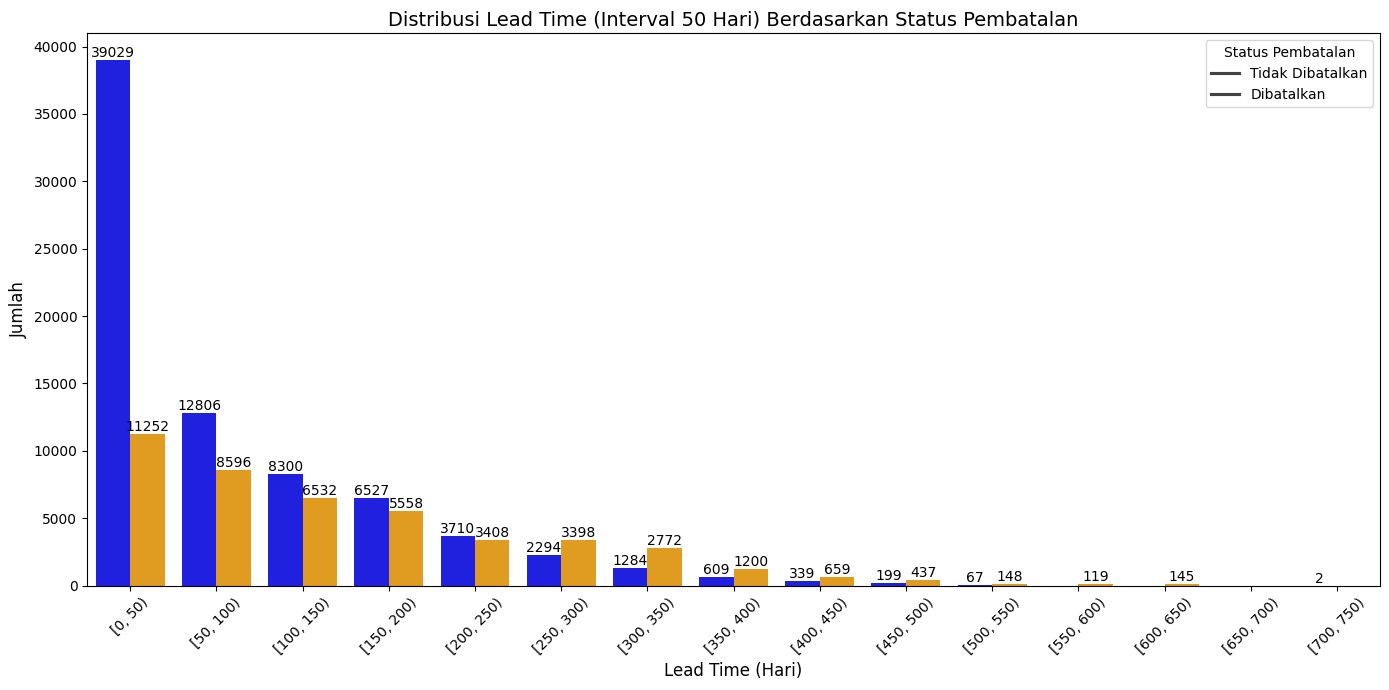

In [ ]:
# Membuat binning untuk lead_time dengan interval 50
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=range(0, df['lead_time'].max() + 50, 50), right=False)

# Mengelompokkan data berdasarkan lead_time_bins dan is_canceled
lead_time_canceled = df.groupby(['lead_time_bins', 'is_canceled']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))

# Membuat barplot
palette = {0: 'blue', 1: 'orange'}  # Warna untuk is_canceled
sns.barplot(data=lead_time_canceled, x='lead_time_bins', y='count', hue='is_canceled', palette=palette)

# Menambahkan nilai di atas setiap batang
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Lead Time (Interval 50 Hari) Berdasarkan Status Pembatalan', fontsize=14)
plt.xlabel('Lead Time (Hari)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menyesuaikan label sumbu x
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

# Menyusun tata letak agar lebih rapi
plt.tight_layout()
plt.show()


Berikut adalah strategi yang bisa diambil berdasarkan pembagian **Lead Time** dan tingkat pembatalan:

### 1. **Pembagian Lead Time per 50 (0-750)**
Lead time dibagi dalam interval 50, mulai dari 0 hingga 750. Kami akan menganalisis tingkat pembatalan pada rentang lead time ini, dengan fokus pada perubahan tren pembatalan.

### 2. **Tingkat Pembatalan pada Lead Time**
- **0 hingga 250**: Pada rentang ini, kami akan melihat bahwa tingkat pembatalan lebih banyak **Tidak Batal** daripada **Batal**.
- **250 ke atas**: Di atas 250, kebalikannya terjadi, yaitu tingkat pembatalan lebih banyak **Batal** daripada **Tidak Batal**.

Berdasarkan hal ini, berikut adalah langkah yang dapat diambil:

### Keputusan Berdasarkan Analisis:
1. **Untuk Lead Time 0 hingga 250**:
   - Dapat memanfaatkan **tidak banyak pembatalan** untuk meningkatkan kepercayaan tamu dan melakukan promosi untuk pemesanan dalam jangka waktu pendek (terutama untuk lead time rendah).
   - Bisa juga menawarkan penawaran khusus untuk tamu yang melakukan pemesanan lebih awal dengan lead time yang lebih pendek, misalnya diskon atau paket spesial untuk jangka waktu mendekati kedatangan (misalnya, 0 hingga 100 hari sebelumnya).
   - Ini bisa mendorong lebih banyak tamu untuk memesan di hotel tanpa khawatir melakukan pembatalan.

2. **Untuk Lead Time 250 hingga 750**:
   - Pada rentang ini, harus lebih berhati-hati karena pembatalan lebih banyak terjadi, terutama setelah **250 hari ke atas**. Oleh karena itu, bisa menerapkan kebijakan pembatalan yang lebih ketat atau biaya pembatalan tambahan bagi tamu dengan lead time yang lebih panjang.
   - Jika memungkinkan,bisa menawarkan insentif untuk tamu yang memesan jauh-jauh hari, tetapi dengan syarat bahwa mereka melakukan pemesanan dengan kebijakan pembatalan yang lebih ketat atau non-refundable.
   - Mempertimbangkan promosi untuk **non-refundable deposit** atau memaksa pembatalan hanya dalam waktu terbatas setelah pemesanan bisa mengurangi risiko pembatalan di lead time panjang.

### 3. **Strategi Berdasarkan Tren Pembatalan**:
- **Untuk rentang lead time 0 hingga 250** (lebih banyak tidak batal): Fokus pada **penawaran insentif untuk mendorong pemesanan** dalam jangka waktu dekat dan meningkatkan pemesanan langsung.
- **Untuk rentang lead time 250 hingga 750** (lebih banyak batal): Terapkan **biaya pembatalan lebih tinggi** atau kebijakan lebih ketat dan tawarkan **penawaran non-refundable** untuk meminimalisir kerugian akibat pembatalan.
